In [1]:
%matplotlib inline

import numpy as np;
import numba as jit;
from copy import deepcopy;
import matplotlib.pyplot as plt
from IPython import display

In [2]:
# GRID

#           4    3    2
#
#           5    0    1
#
#           6    7    8

# Define variables used
relaxation_constant      = 1;
grid_step_x              = 1E-3;
grid_step_y              = 1.25E-1;
speed_of_sound           = 1;
time_step                = 1 / speed_of_sound;
directional_weights      = np.array([16,4,1,4,1,4,1,4,1]) / 36;
unit_x_velocities        = np.array([0, 1, 1, 0, -1, -1, -1, 0, 1]);
unit_y_velocities        = np.array([0, 0, 1, 1, 1, 0, -1, -1, -1]);
ei                       = np.stack((unit_x_velocities, unit_y_velocities));
density                  = 1E0;
mass                     = 1E0;
particles_per_grid_point = 1E1;
average_density          = particles_per_grid_point;

# Create the grid. We use a triangular grid
x          = np.linspace(0, 1, 1 / grid_step_x + 1);
y          = np.linspace(-grid_step_y/2, 1 + grid_step_y/2, 1/grid_step_y + 2);
[X, Y]     = np.meshgrid(x,y);                     # This is a rectangular grid

# Create the velocity grid.
u           = np.ones(np.shape(x)) * 0.0;                 # Initial x velocity is uniformly 1
v           = np.zeros(np.shape(y));
[U, V]      = np.meshgrid(u,v);

# Create the distributionts
fi          = np.ones((X.shape[0], X.shape[1], 9)) * 10
print(fi.shape);

(10, 1001, 9)


KeyboardInterrupt: 

C:\Users\sybre_000\Anaconda3\lib\site-packages\matplotlib\axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


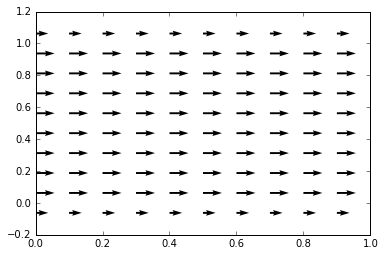

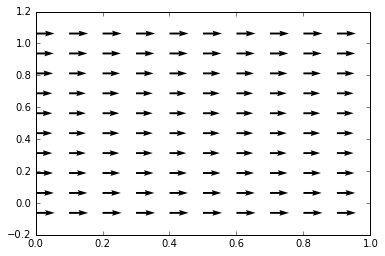

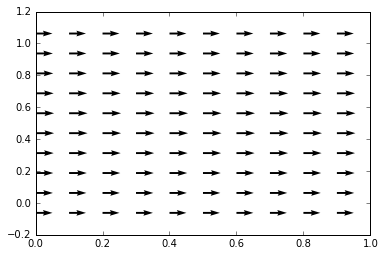

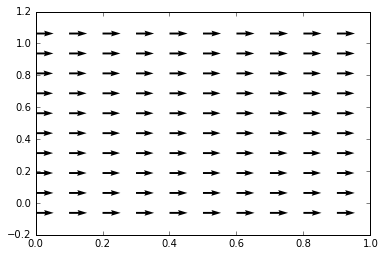

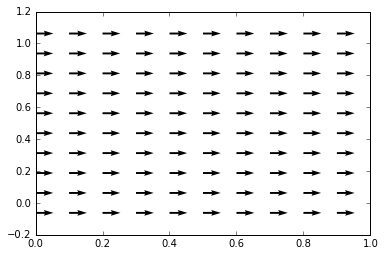

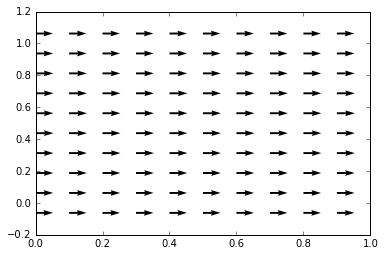

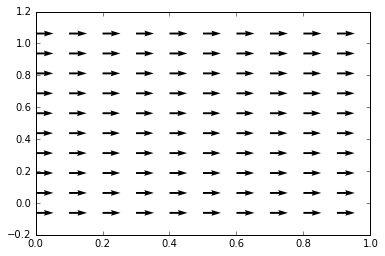

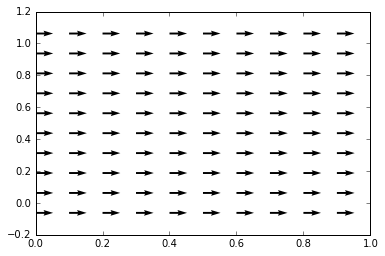

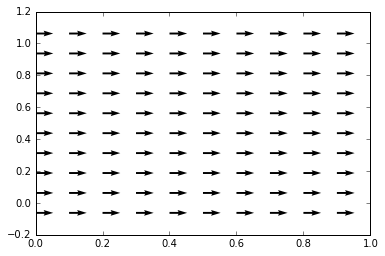

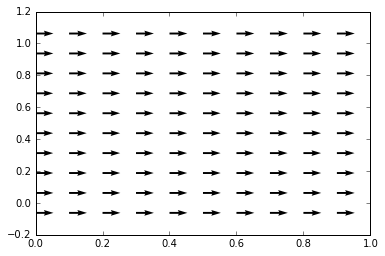

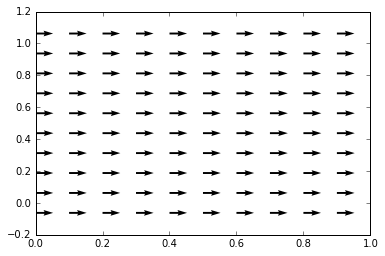

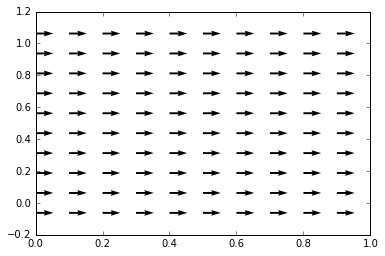

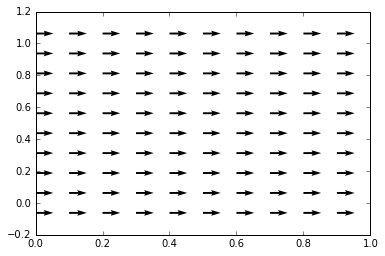

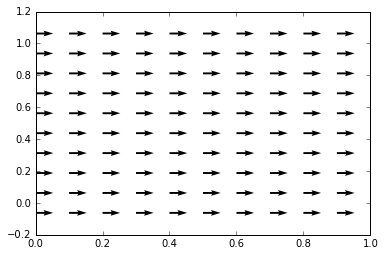

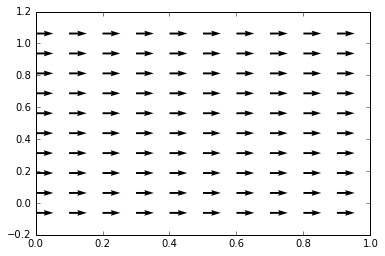

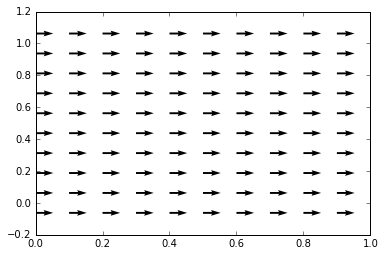

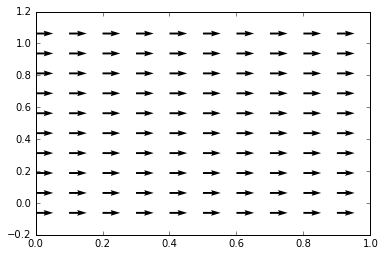

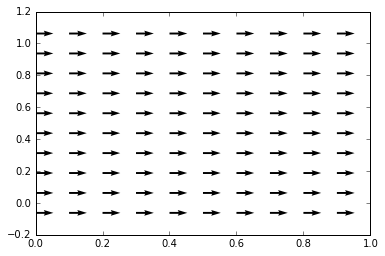

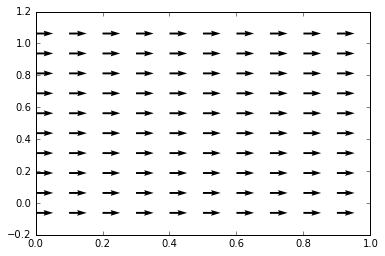

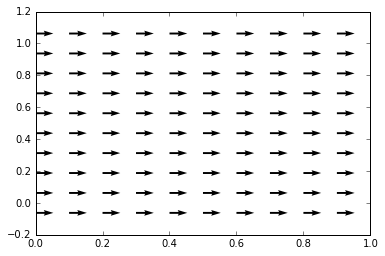

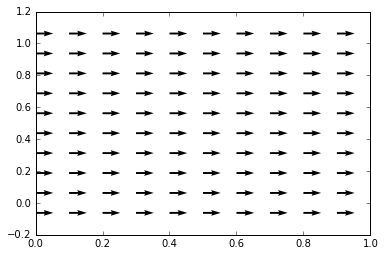

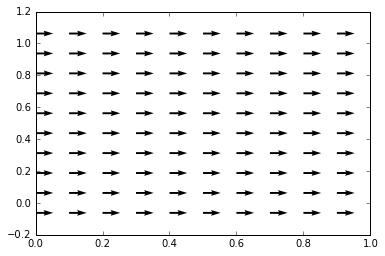

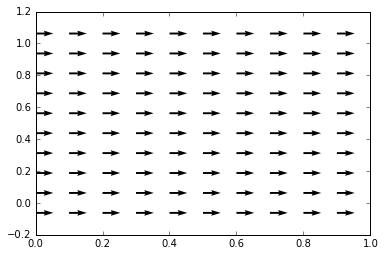

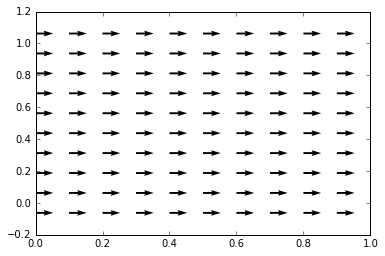

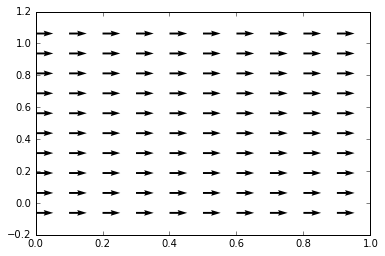

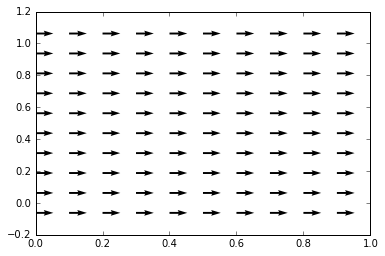

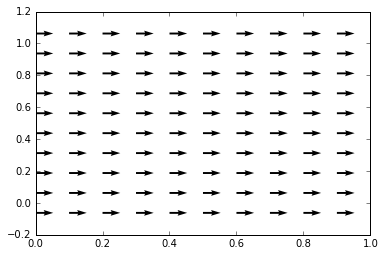

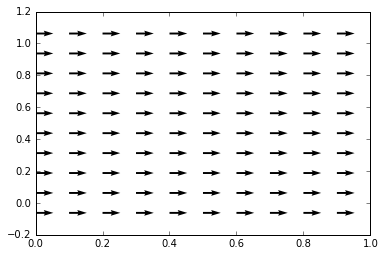

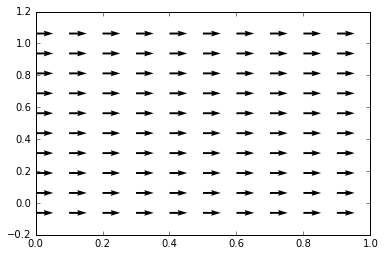

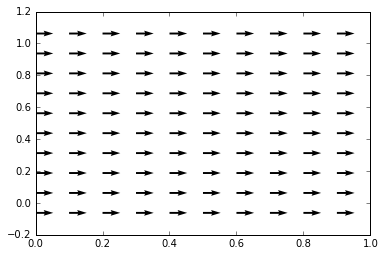

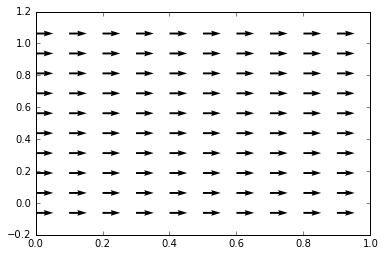

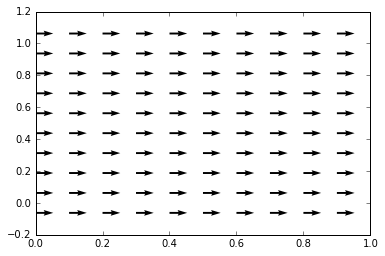

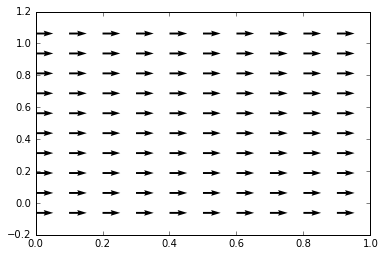

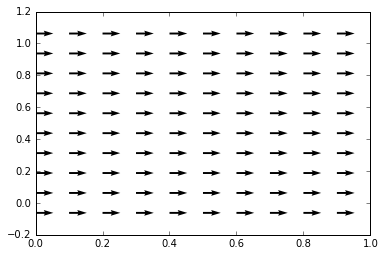

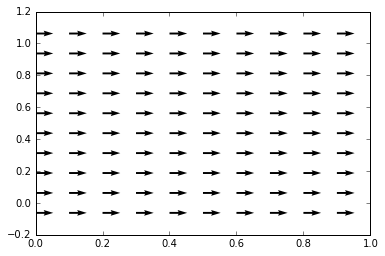

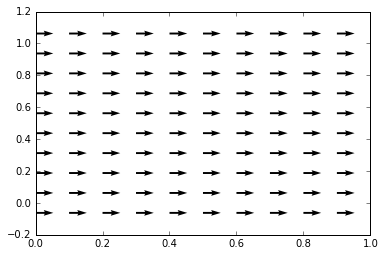

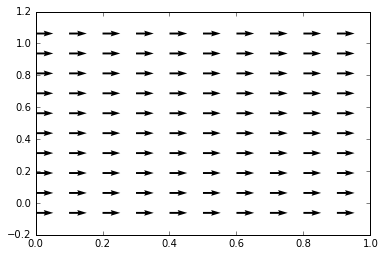

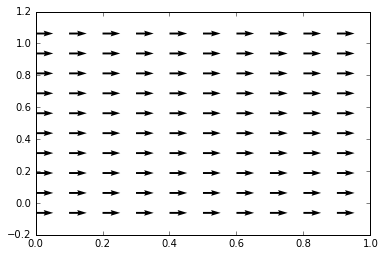

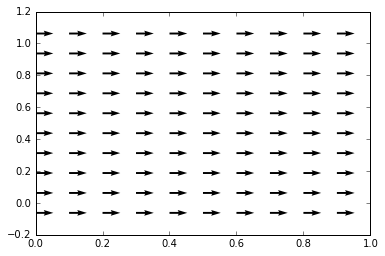

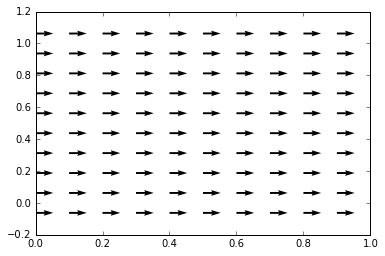

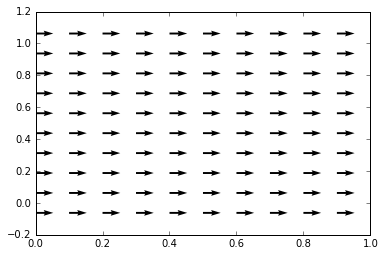

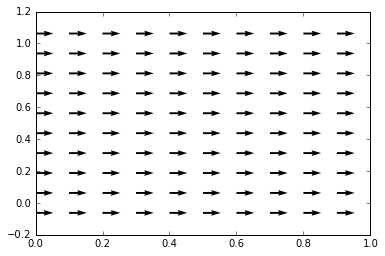

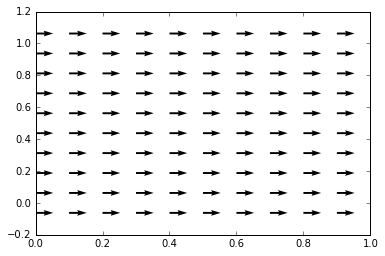

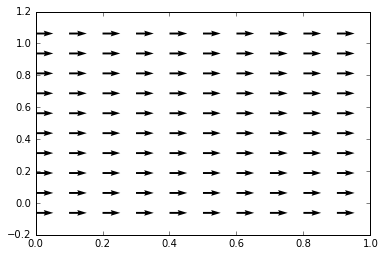

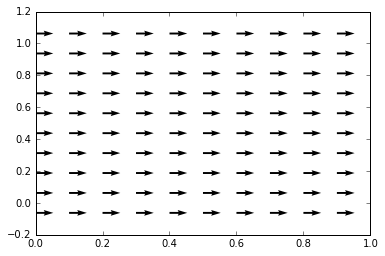

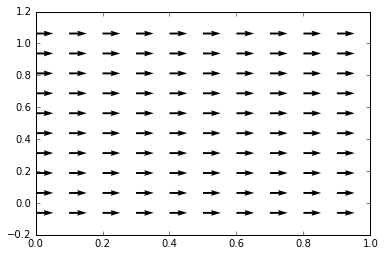

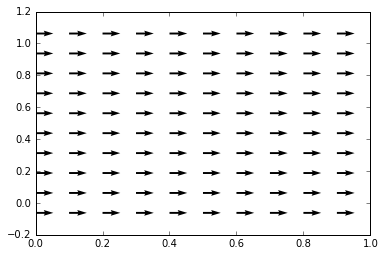

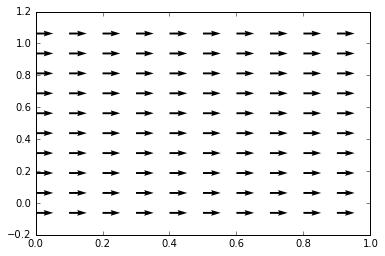

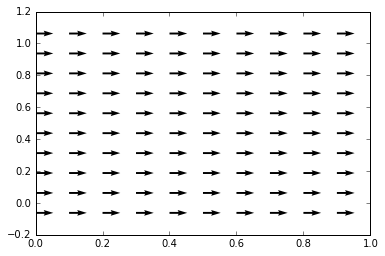

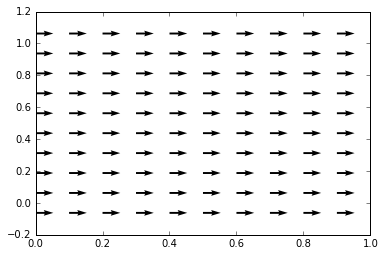

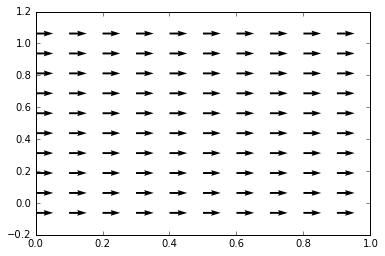

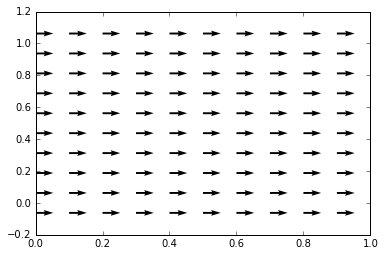

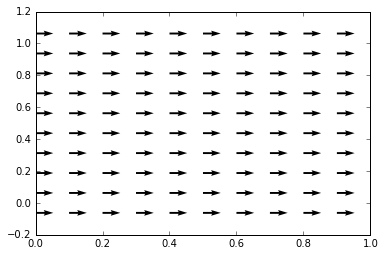

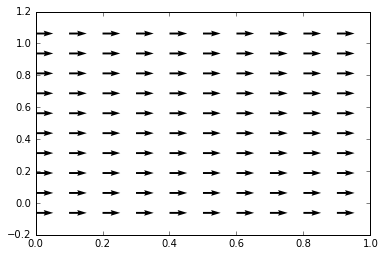

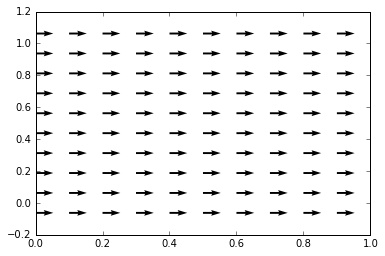

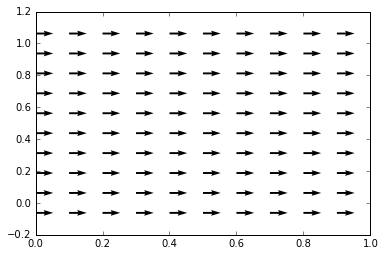

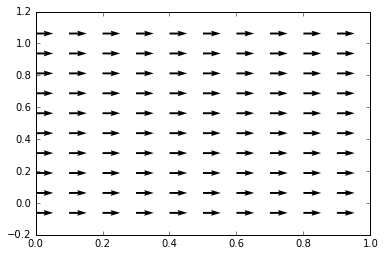

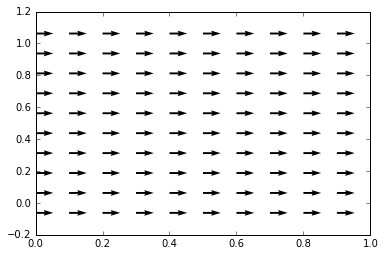

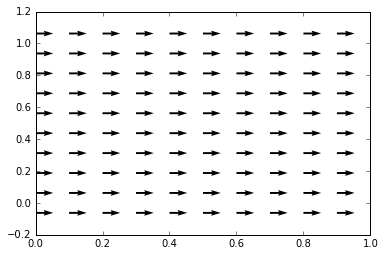

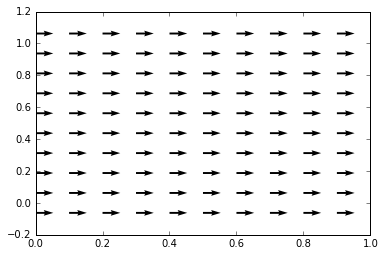

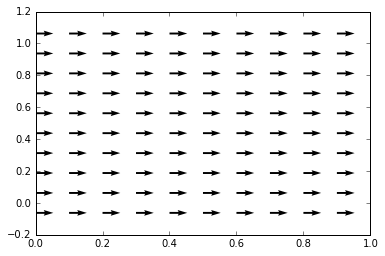

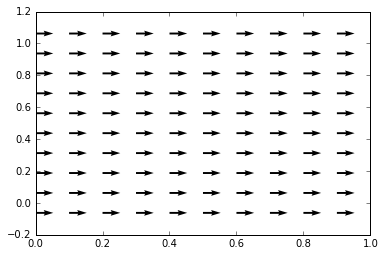

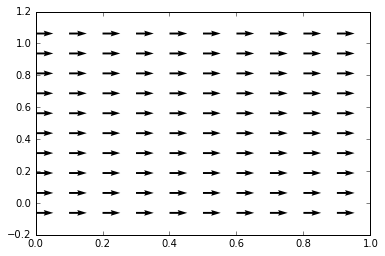

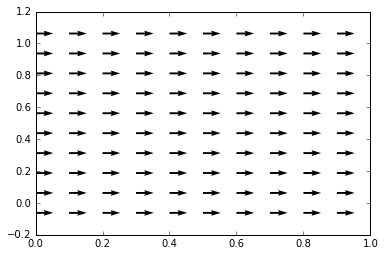

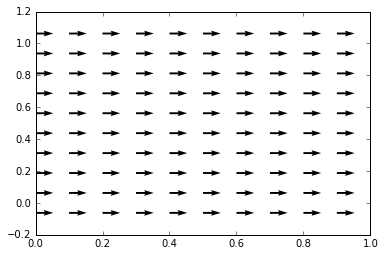

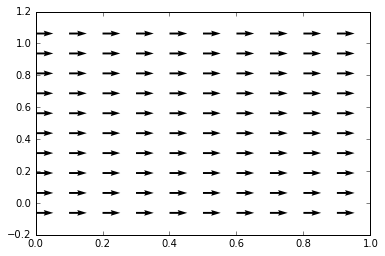

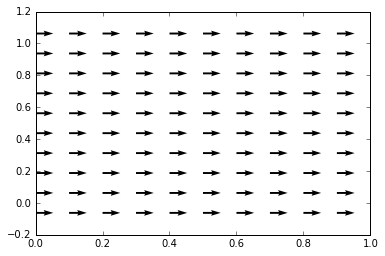

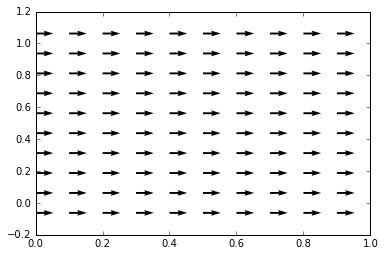

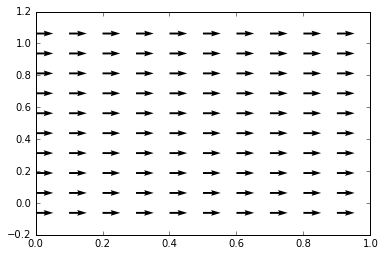

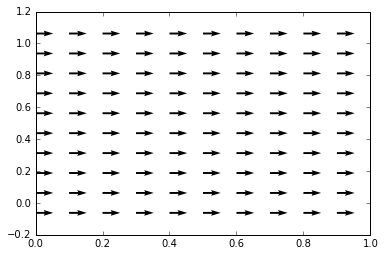

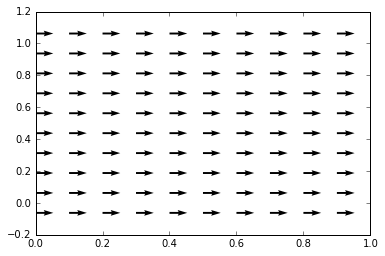

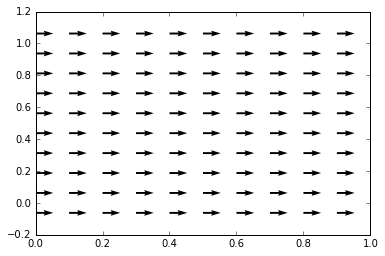

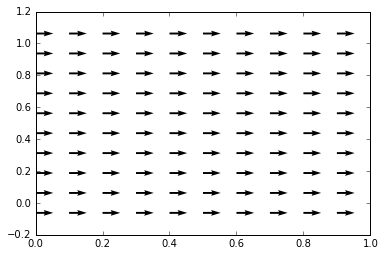

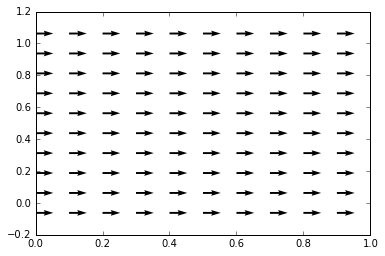

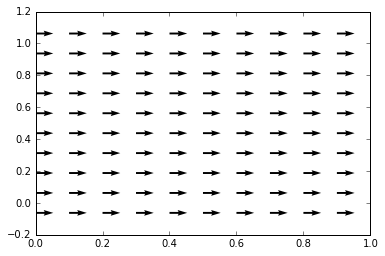

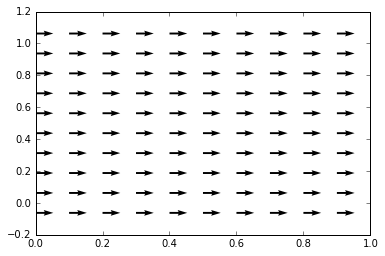

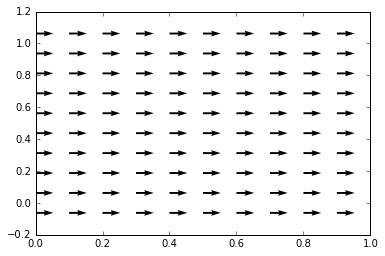

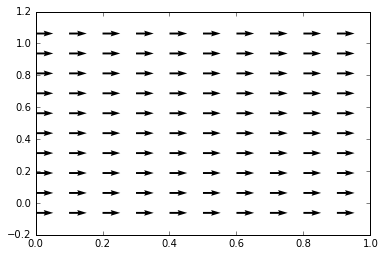

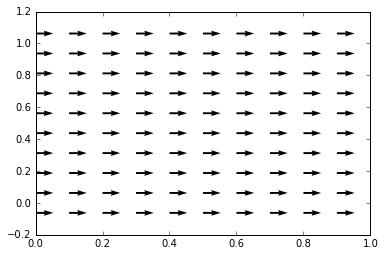

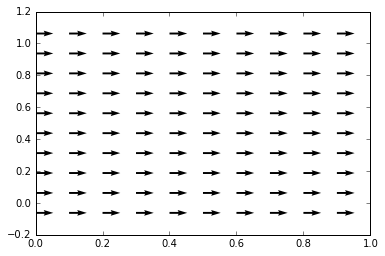

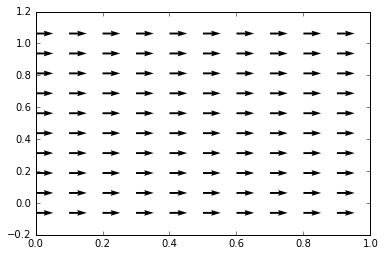

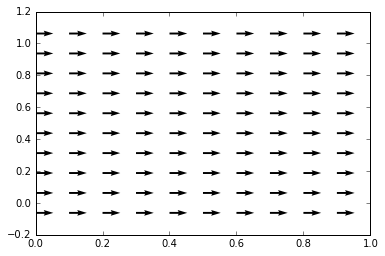

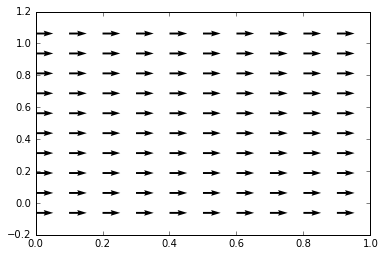

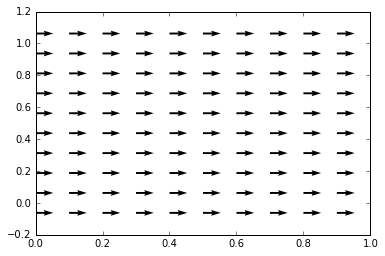

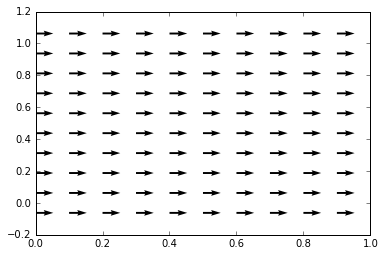

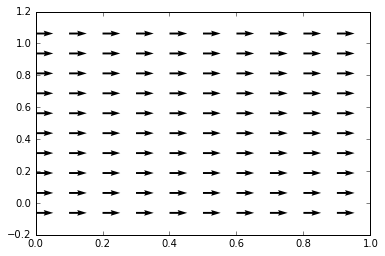

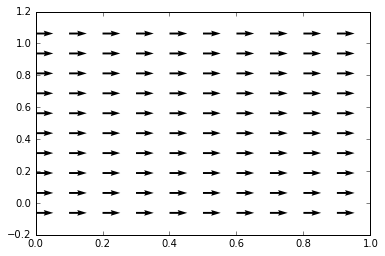

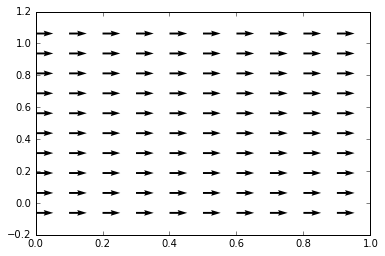

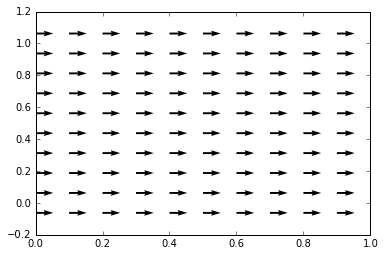

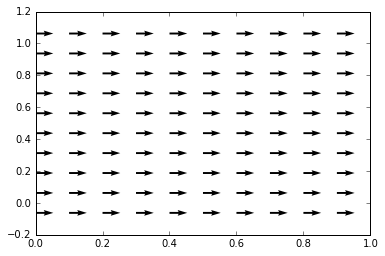

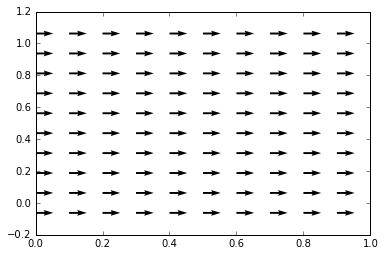

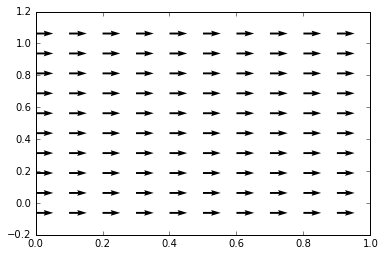

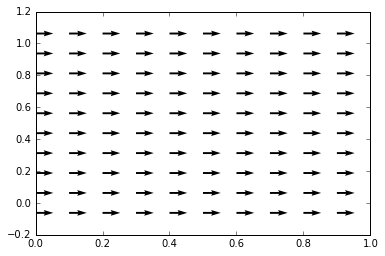

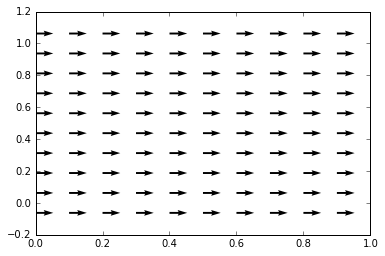

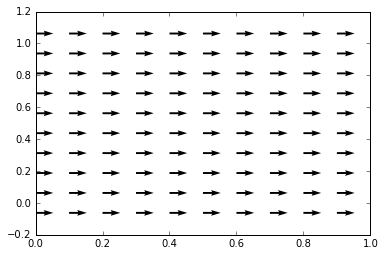

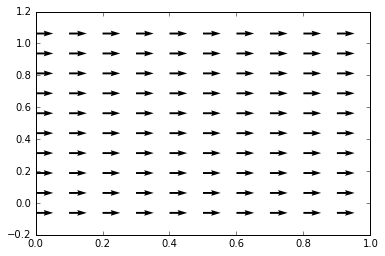

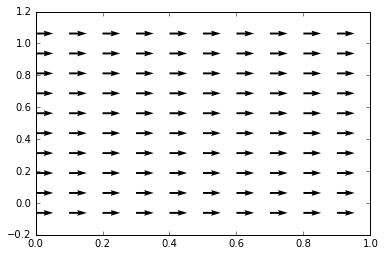

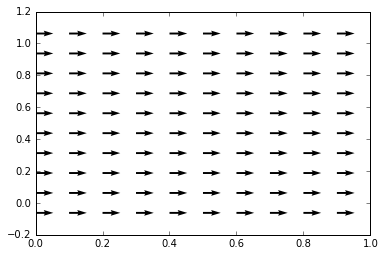

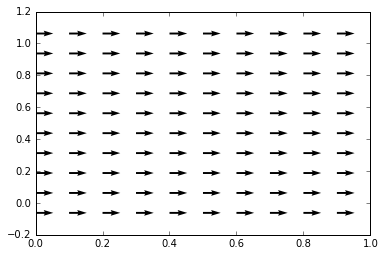

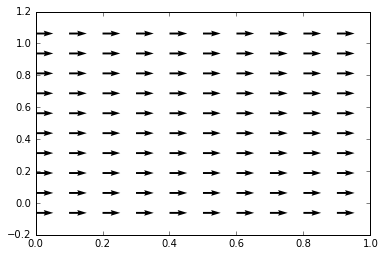

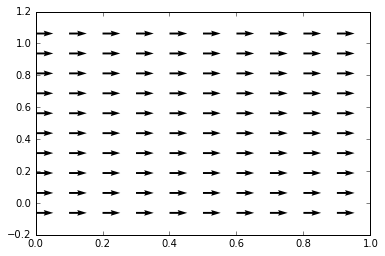

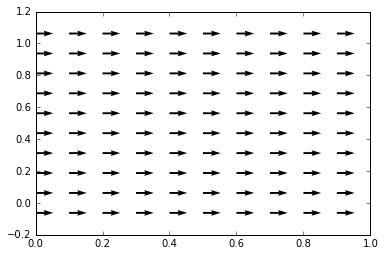

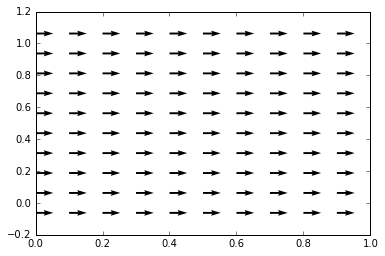

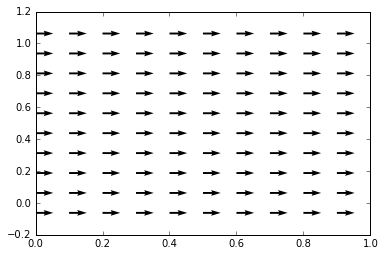

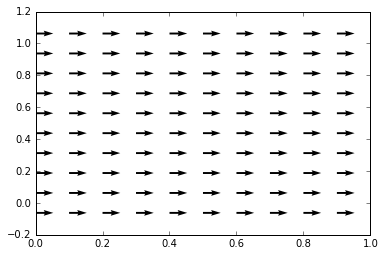

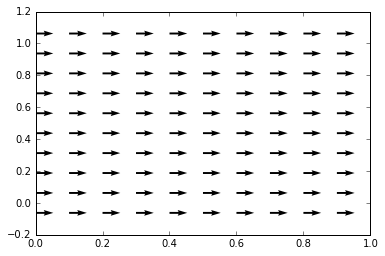

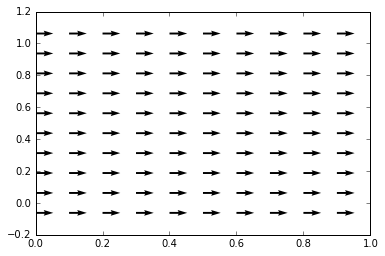

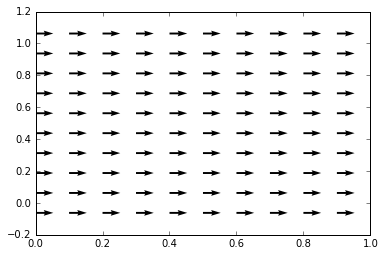

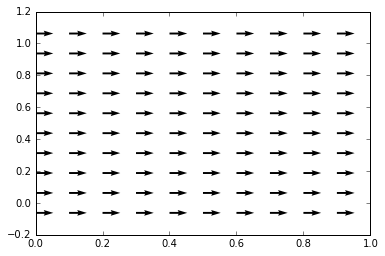

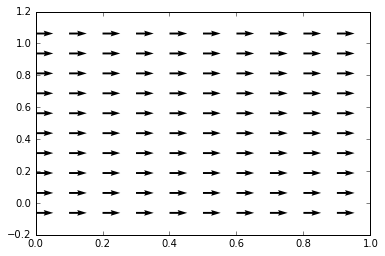

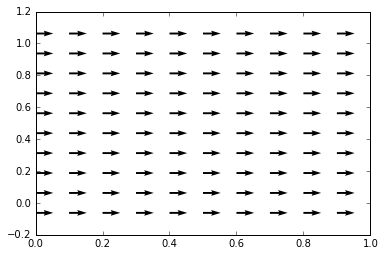

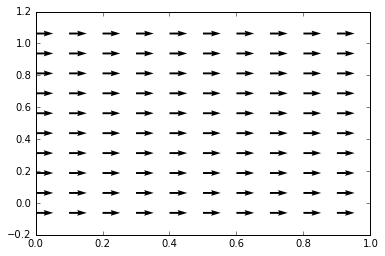

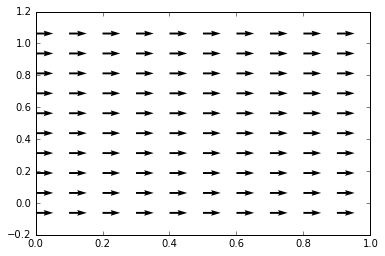

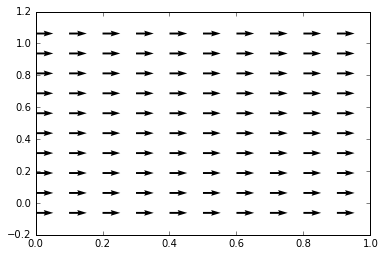

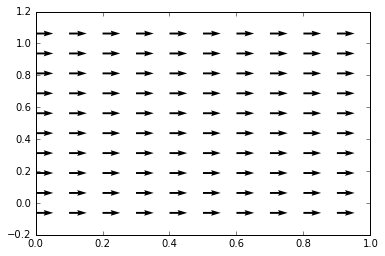

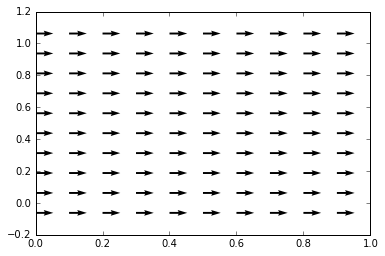

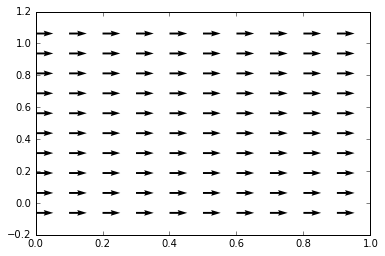

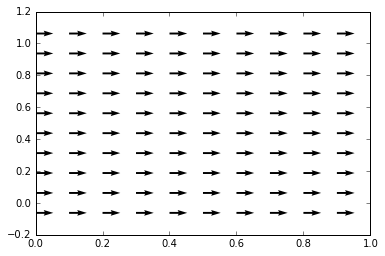

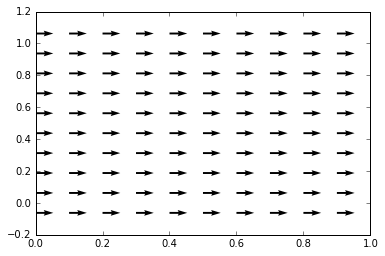

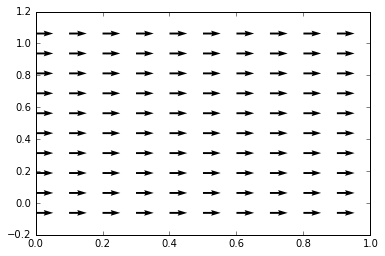

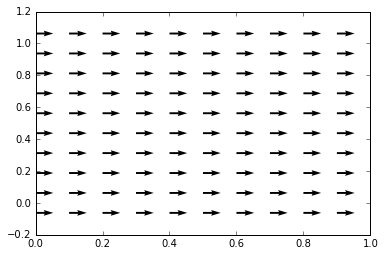

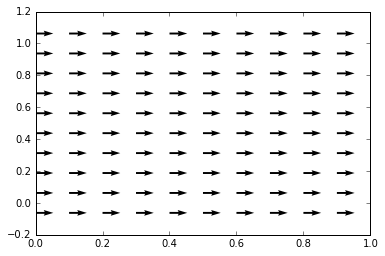

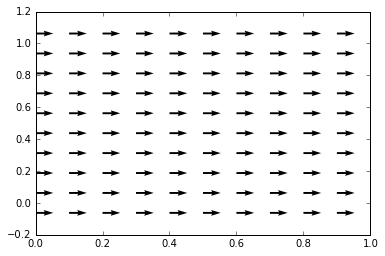

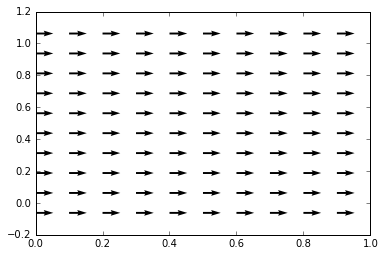

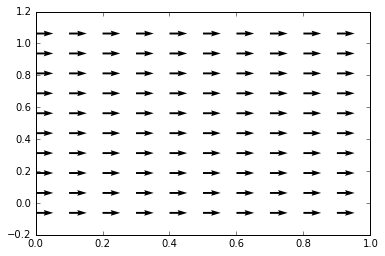

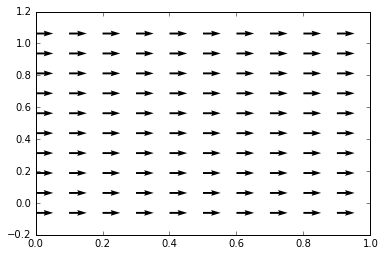

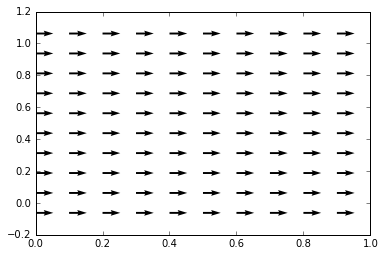

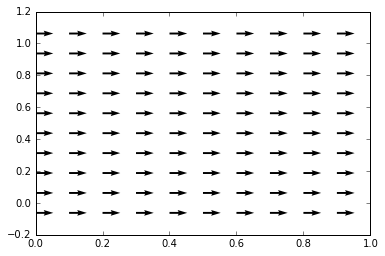

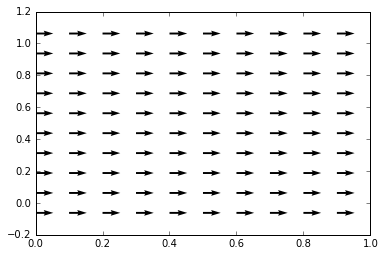

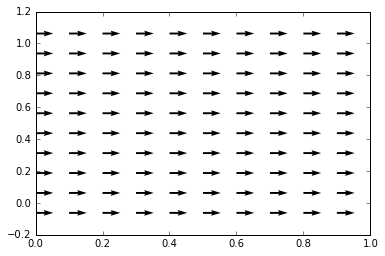

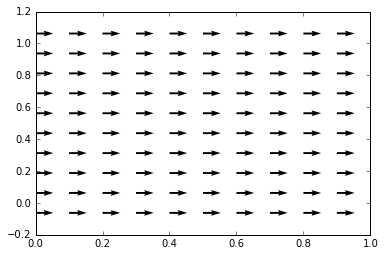

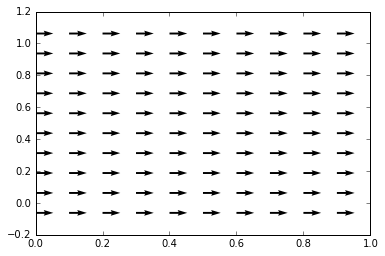

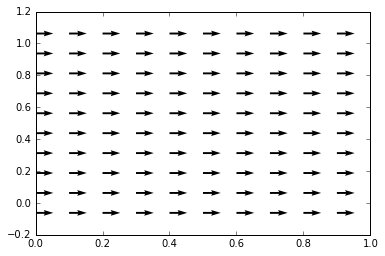

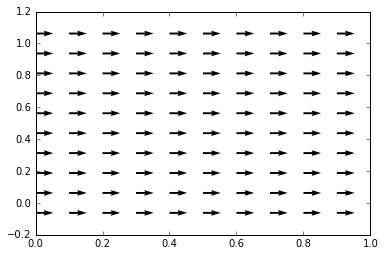

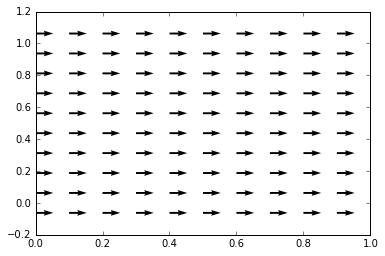

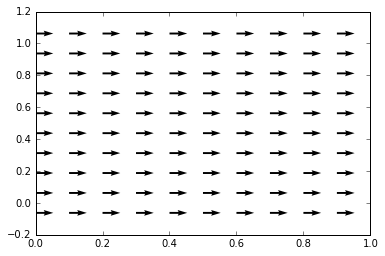

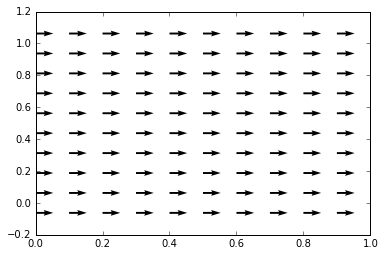

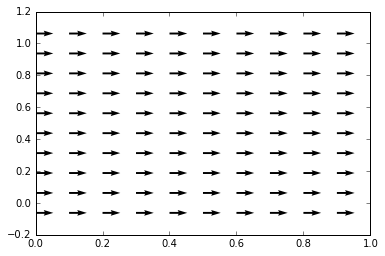

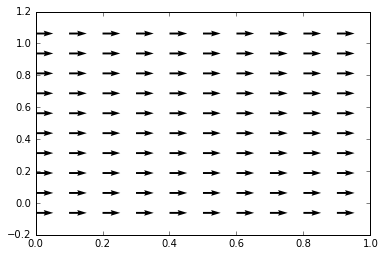

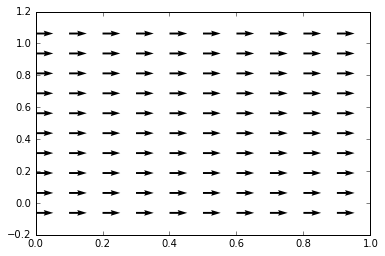

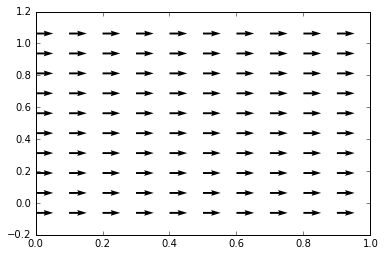

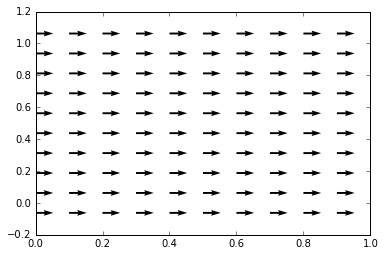

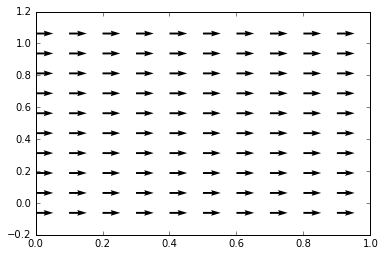

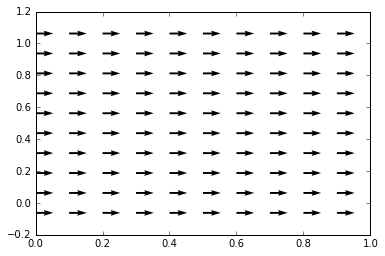

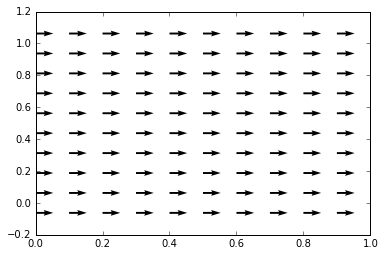

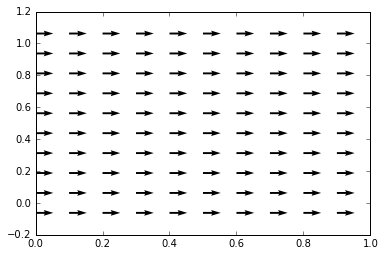

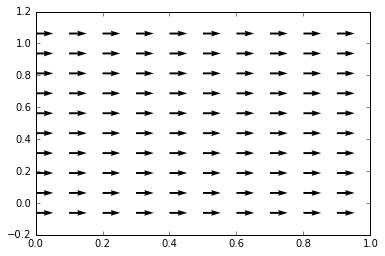

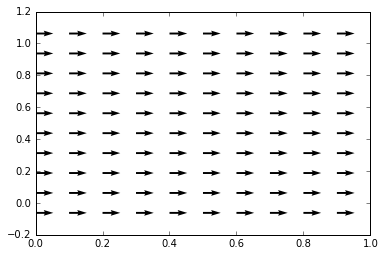

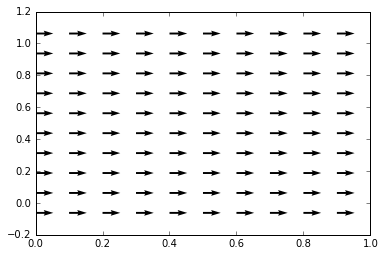

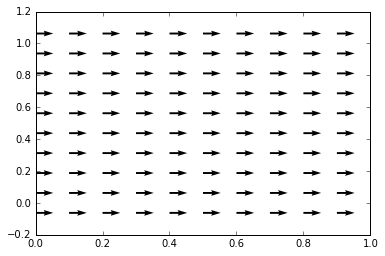

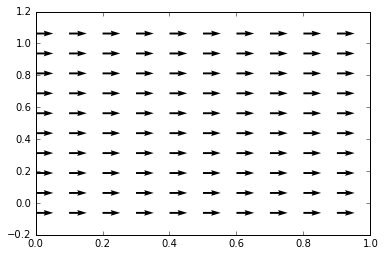

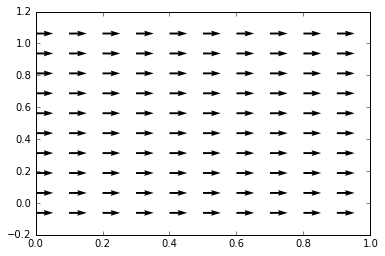

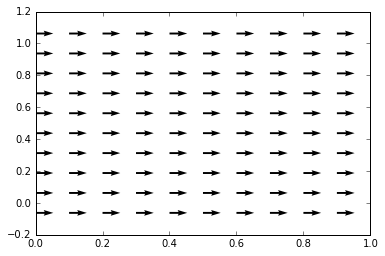

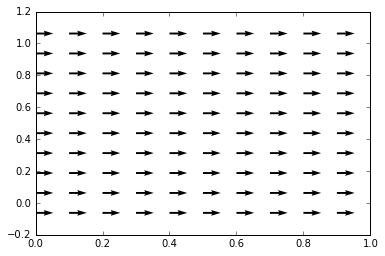

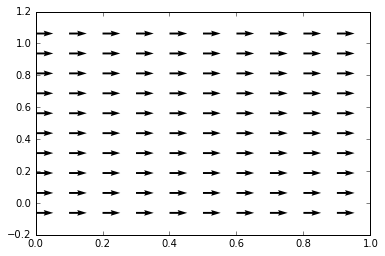

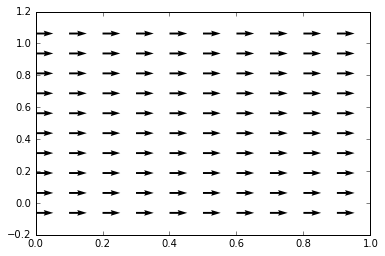

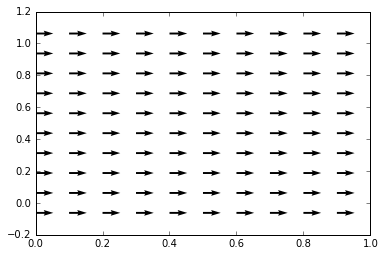

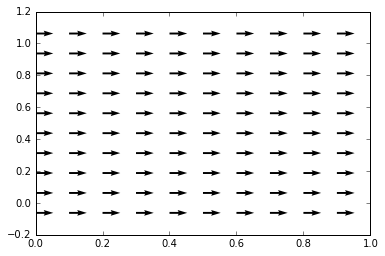

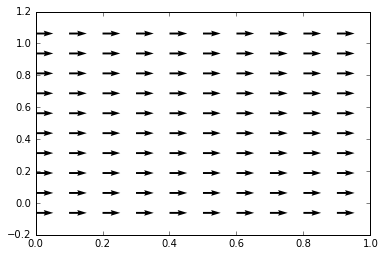

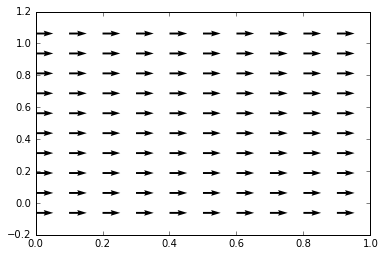

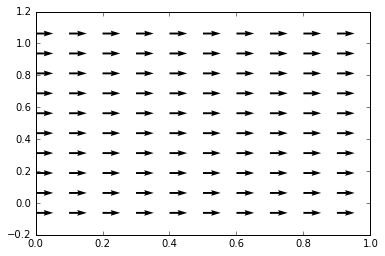

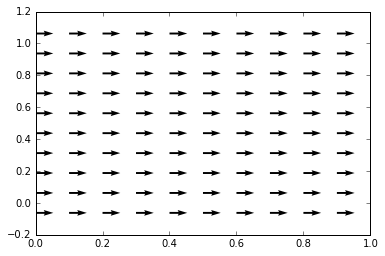

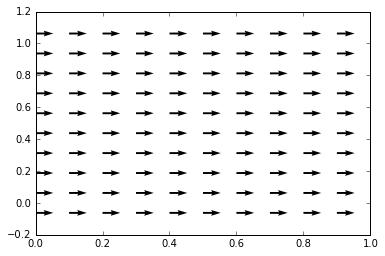

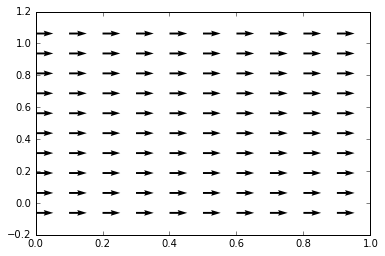

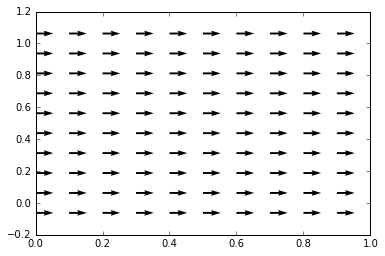

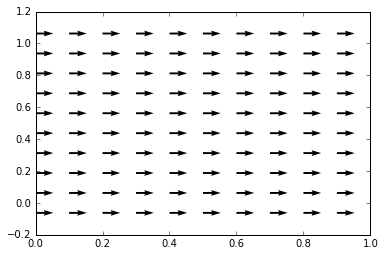

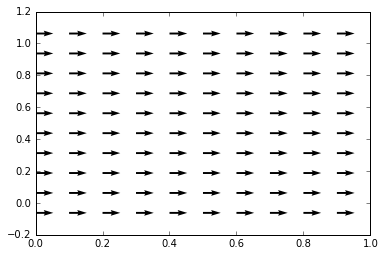

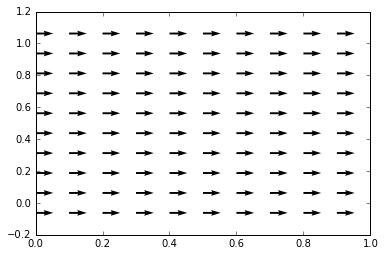

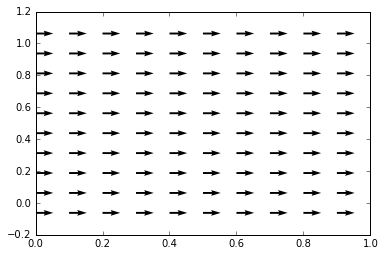

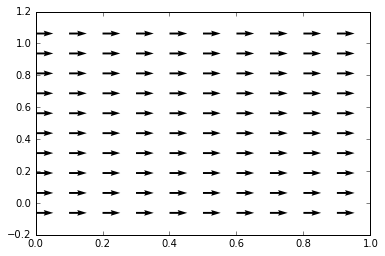

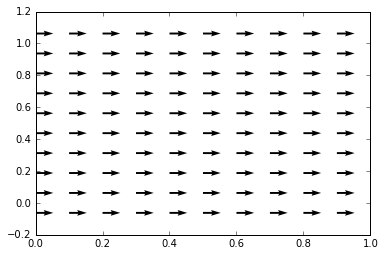

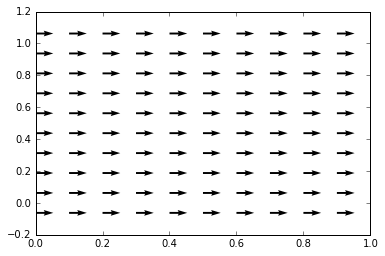

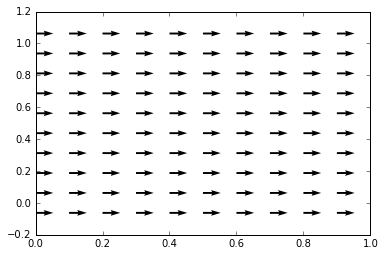

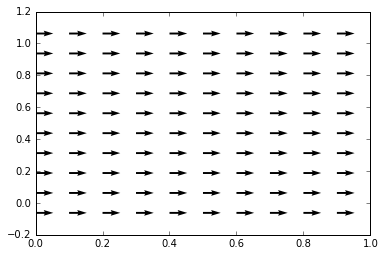

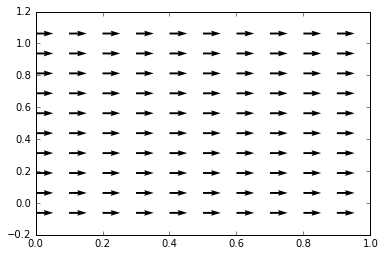

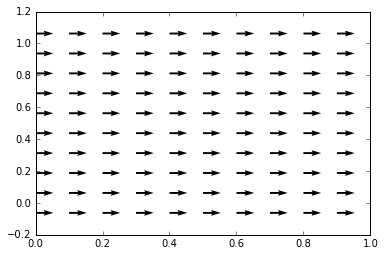

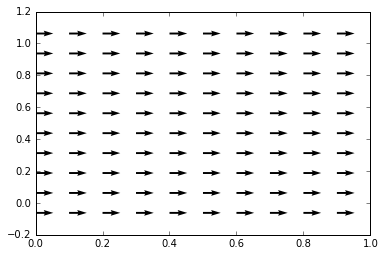

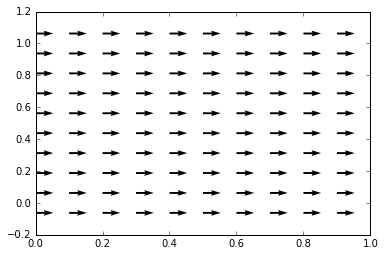

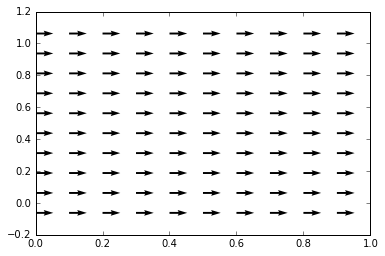

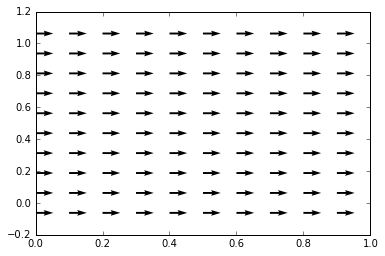

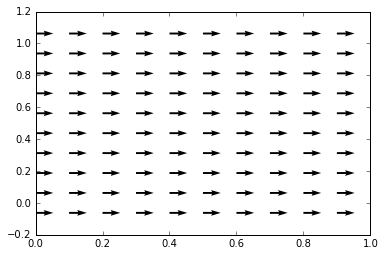

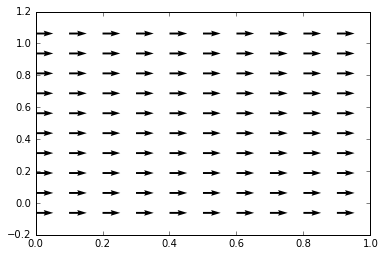

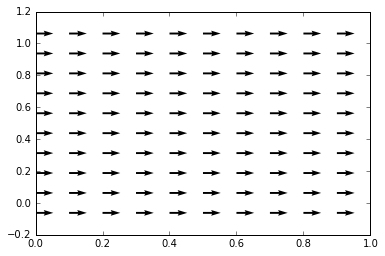

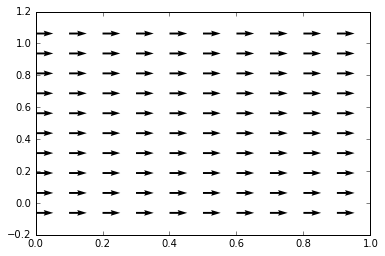

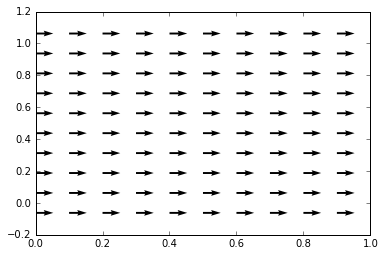

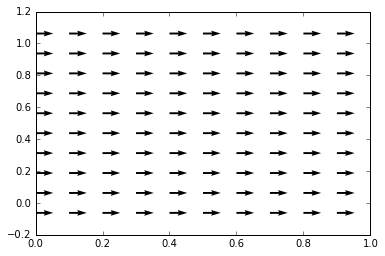

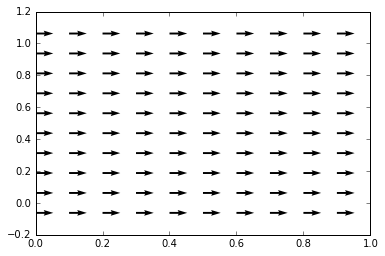

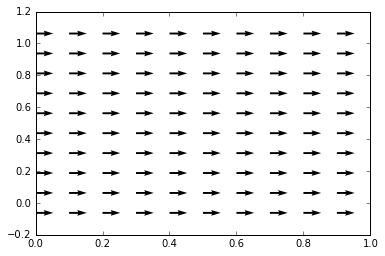

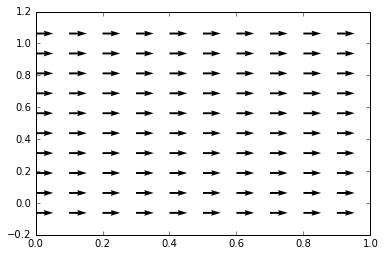

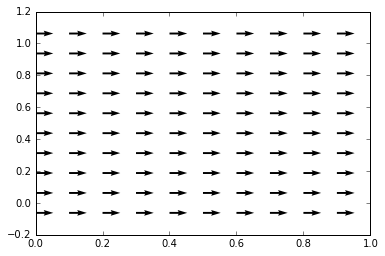

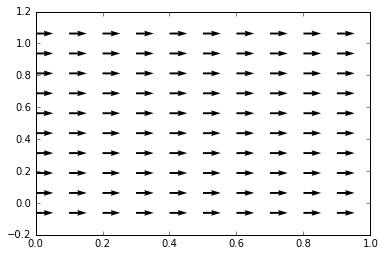

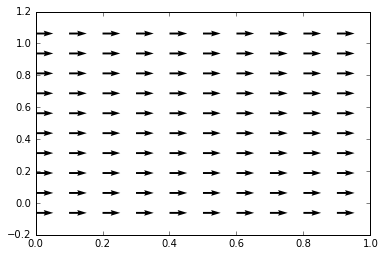

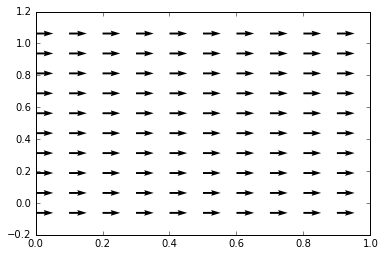

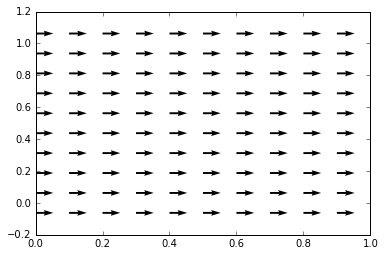

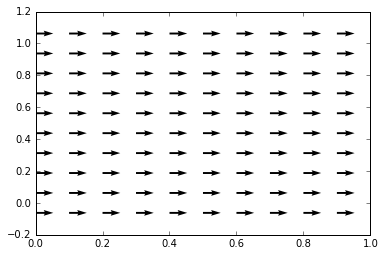

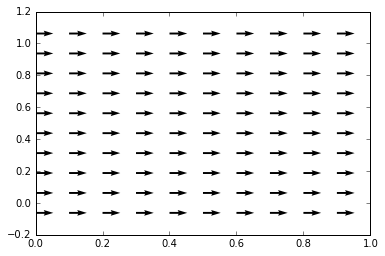

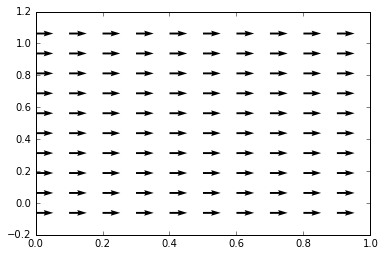

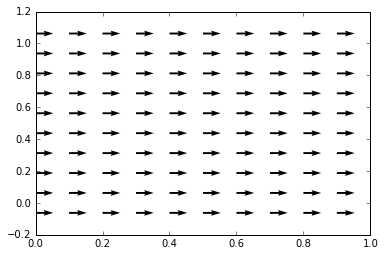

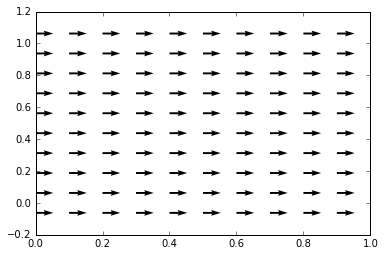

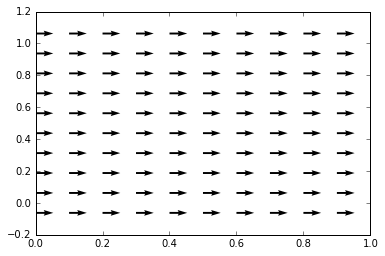

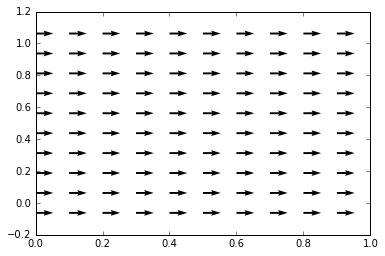

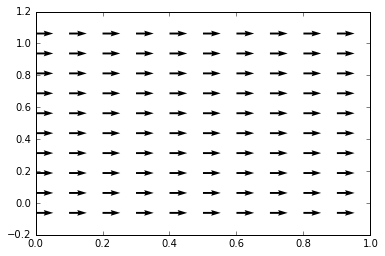

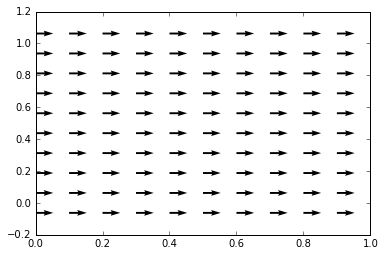

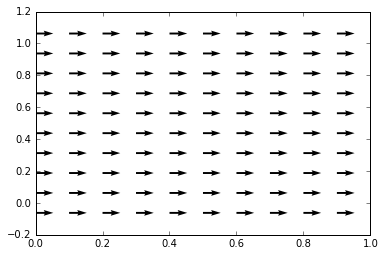

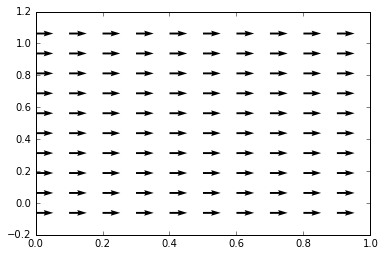

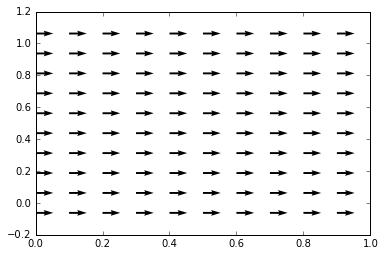

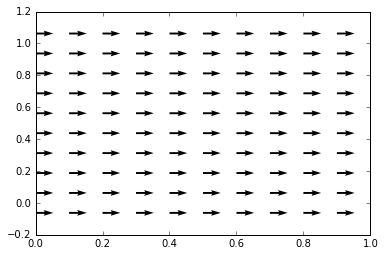

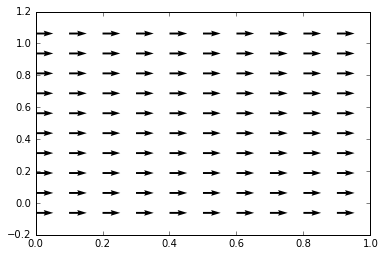

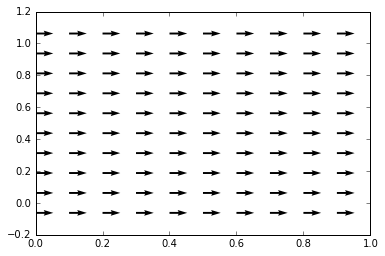

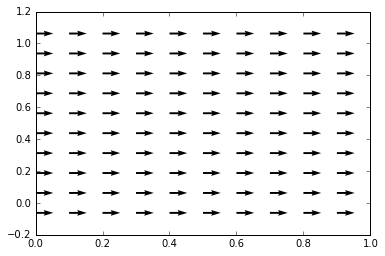

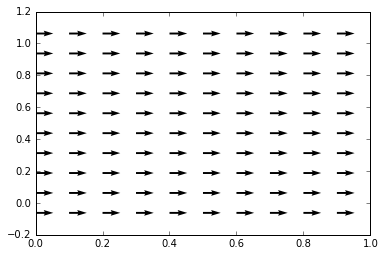

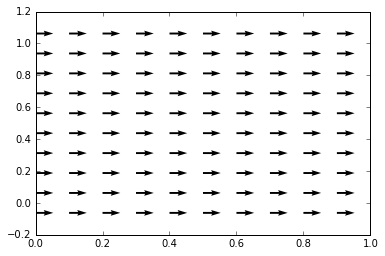

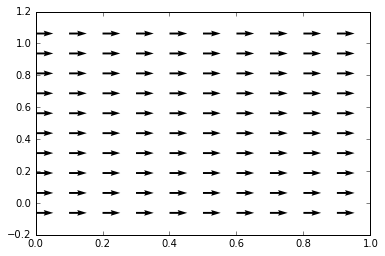

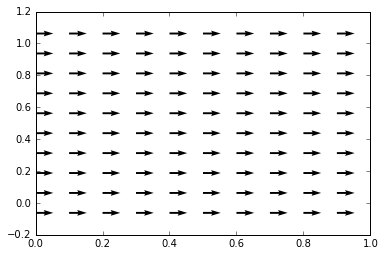

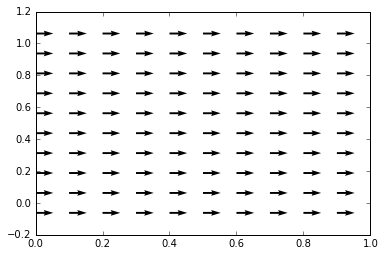

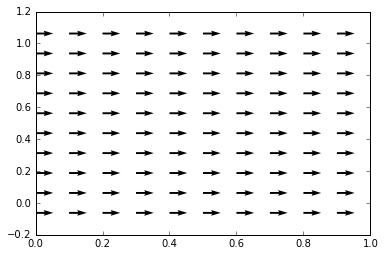

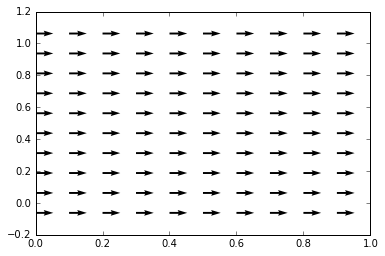

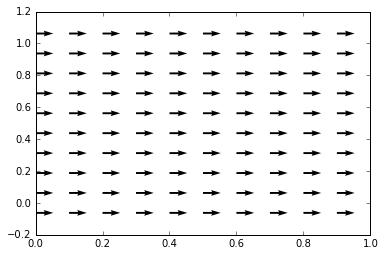

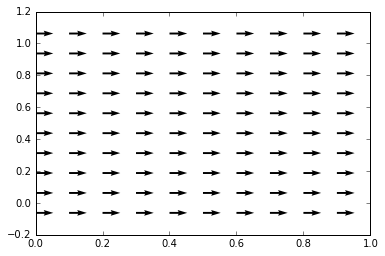

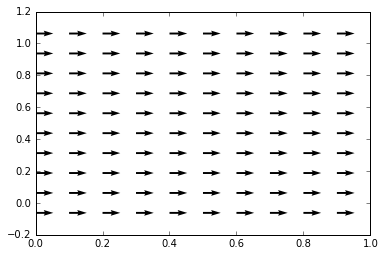

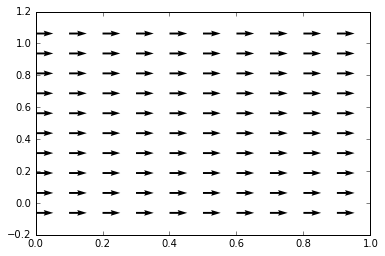

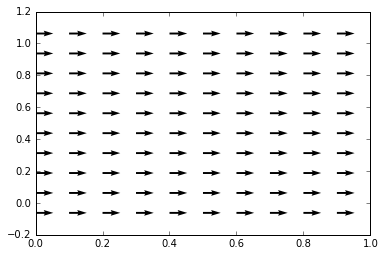

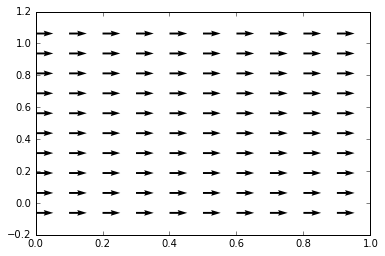

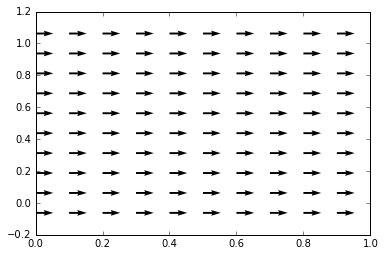

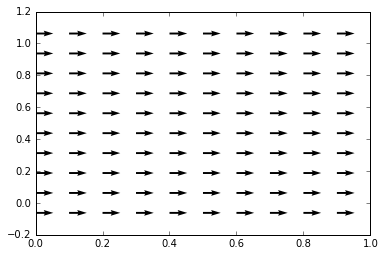

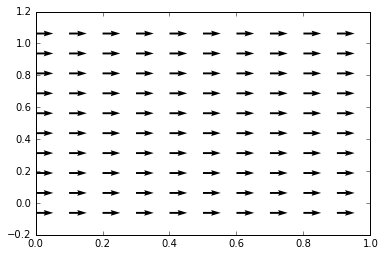

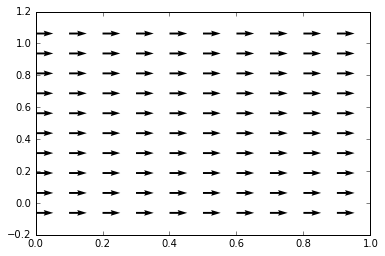

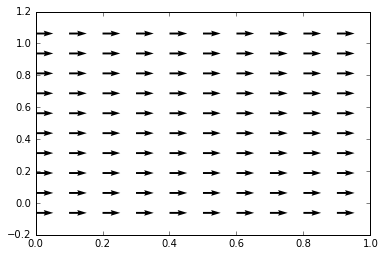

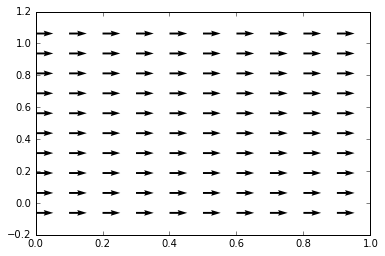

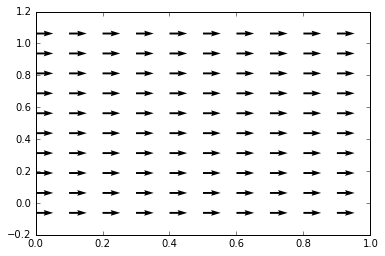

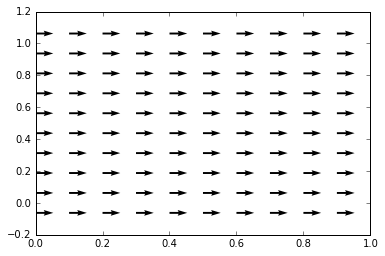

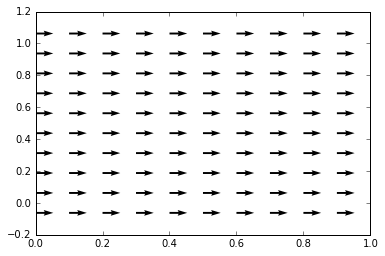

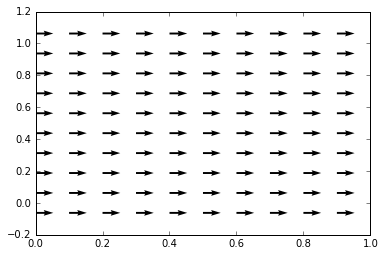

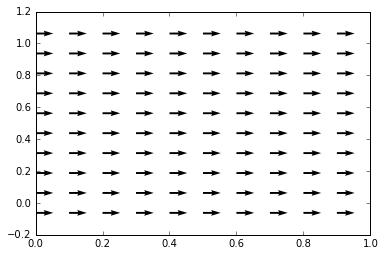

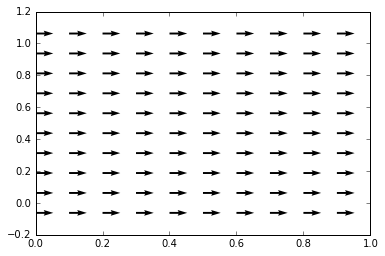

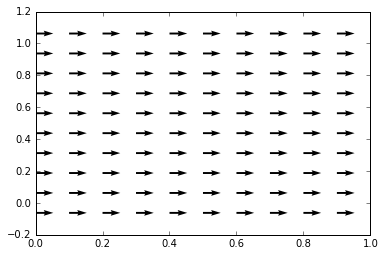

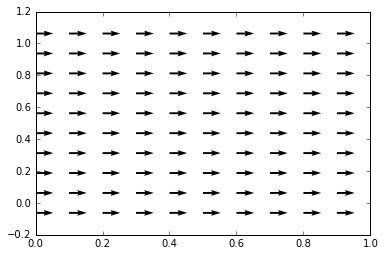

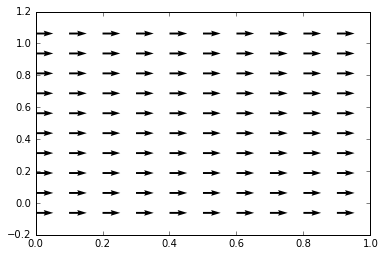

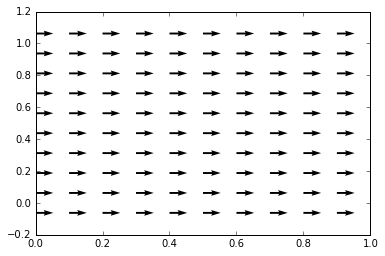

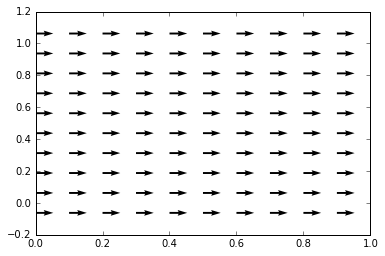

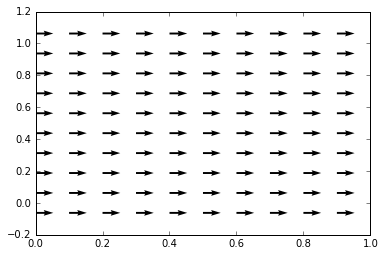

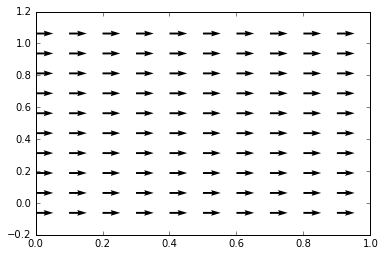

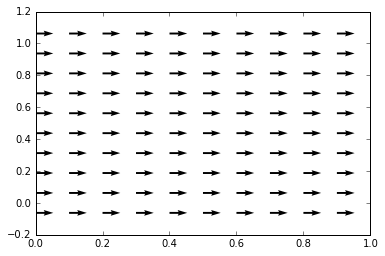

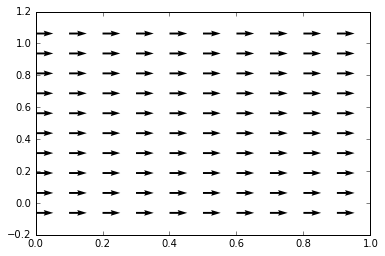

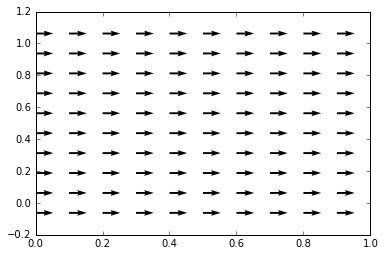

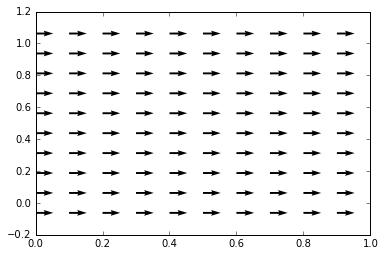

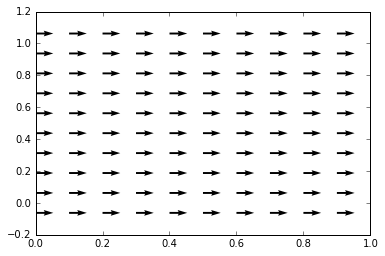

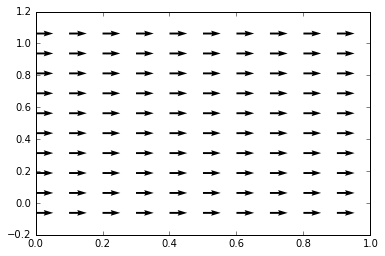

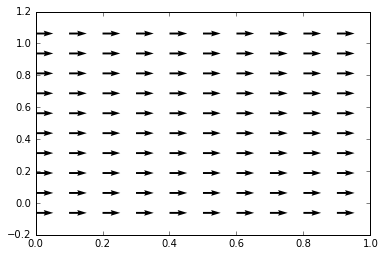

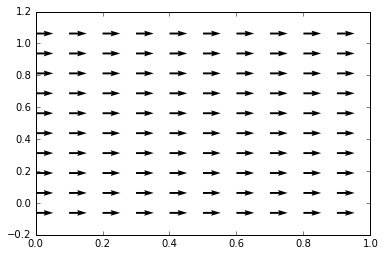

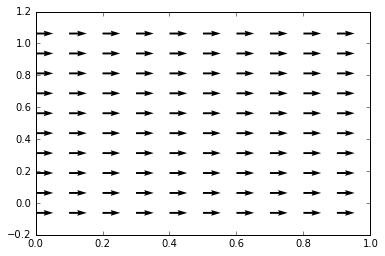

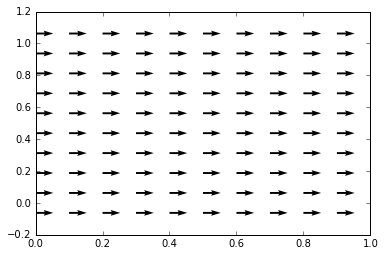

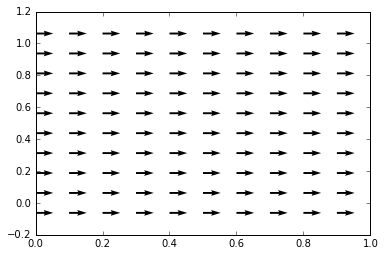

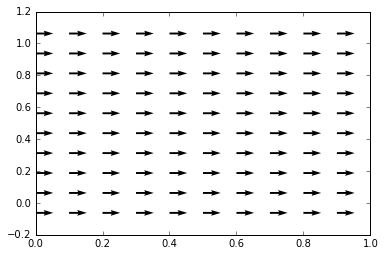

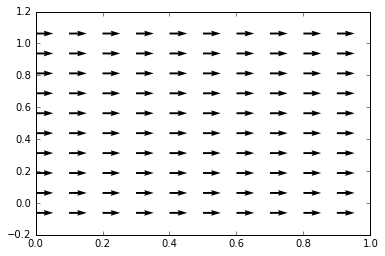

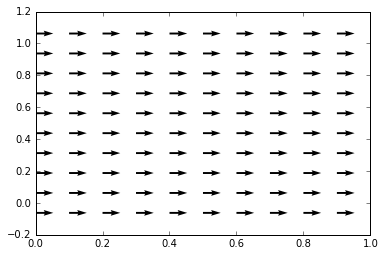

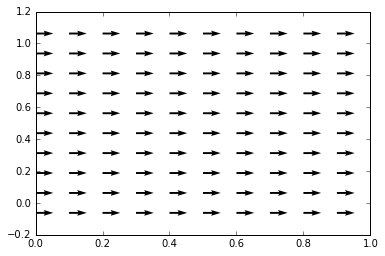

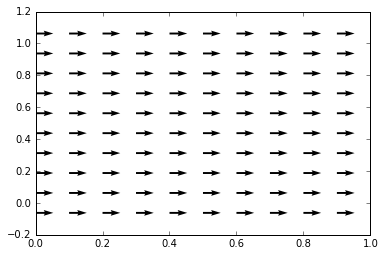

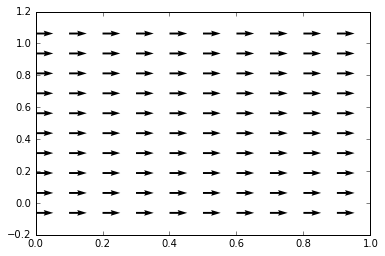

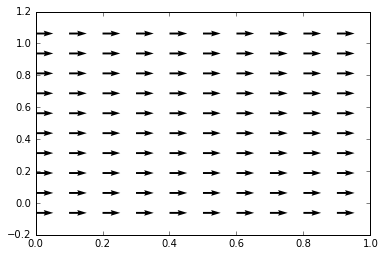

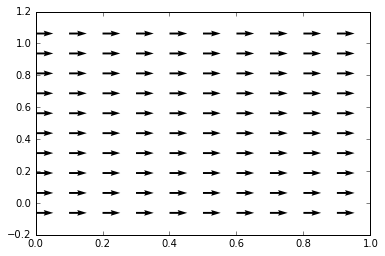

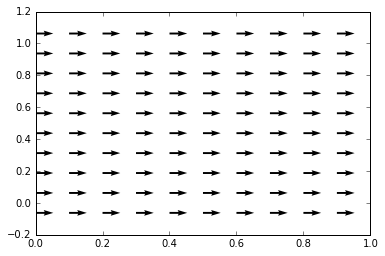

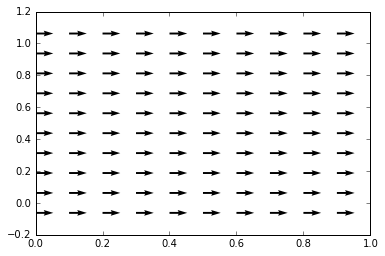

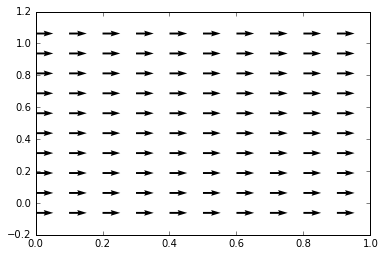

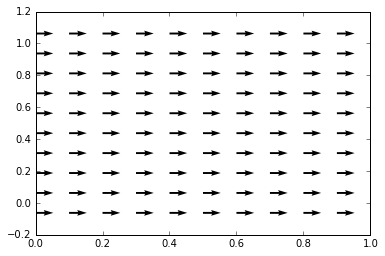

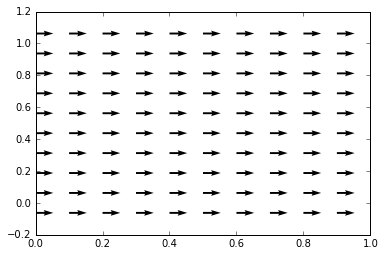

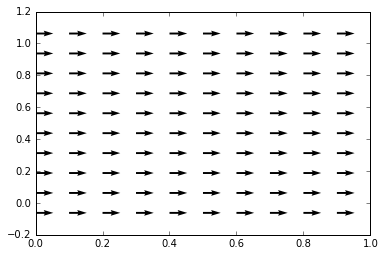

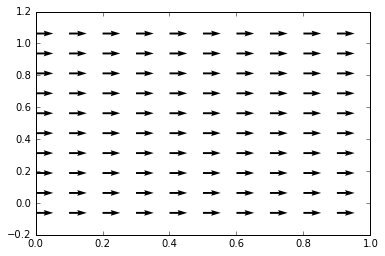

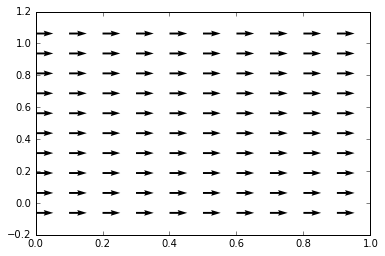

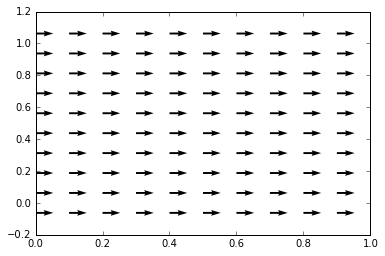

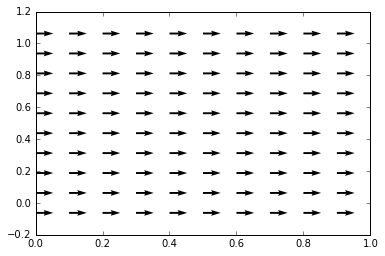

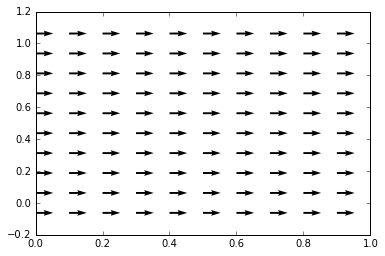

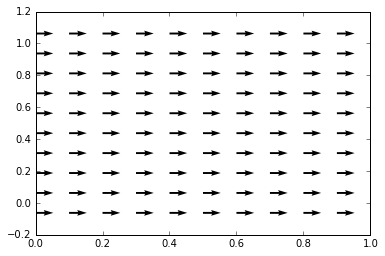

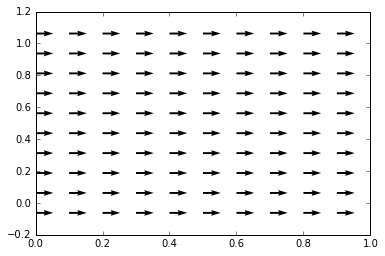

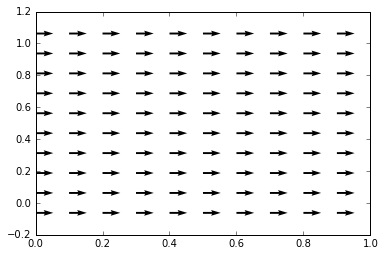

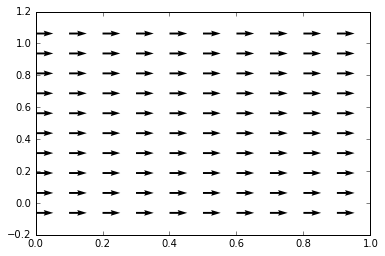

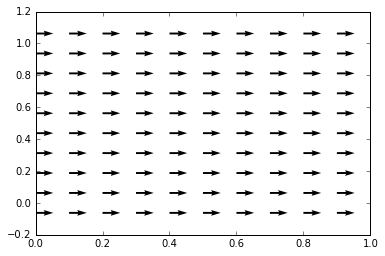

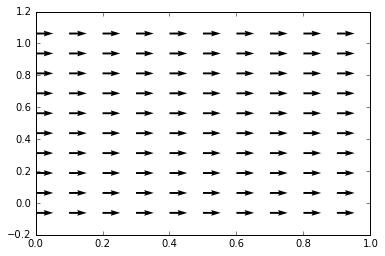

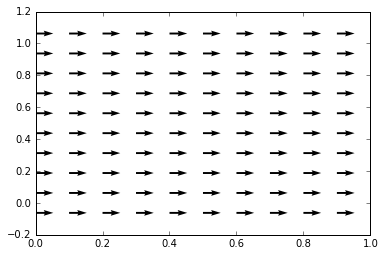

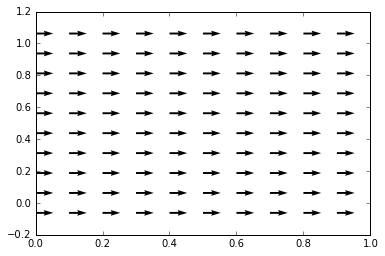

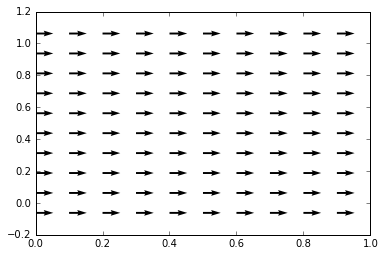

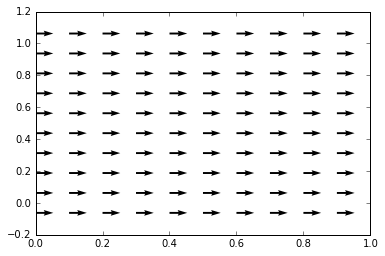

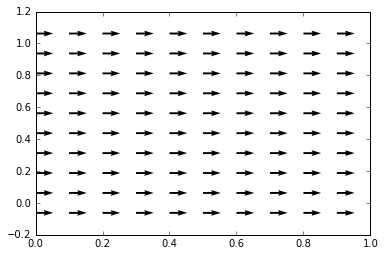

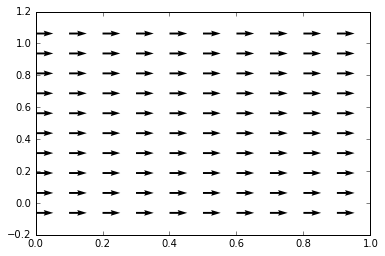

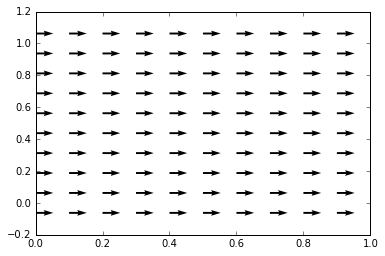

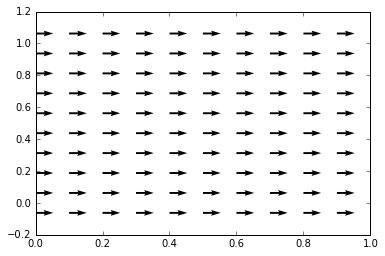

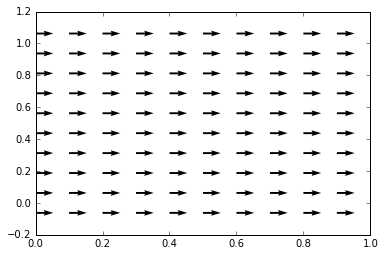

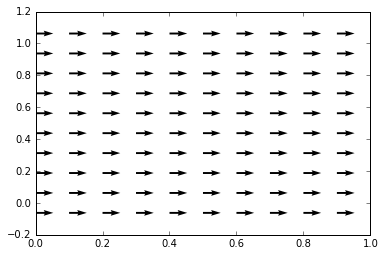

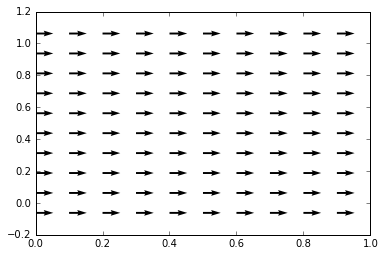

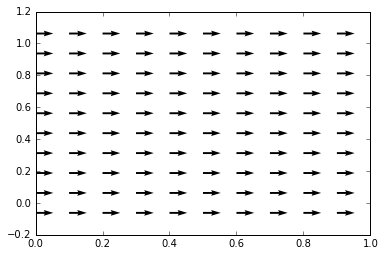

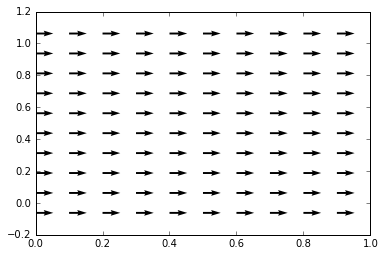

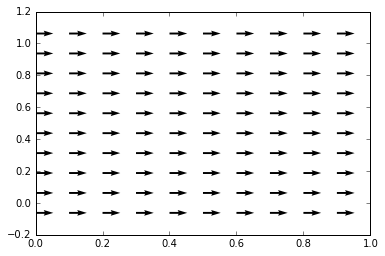

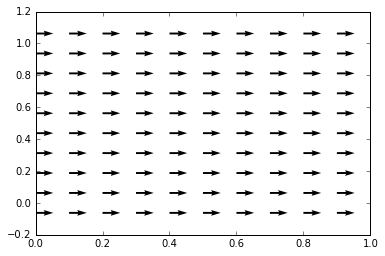

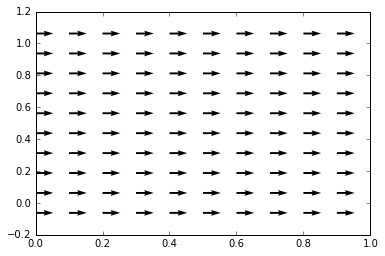

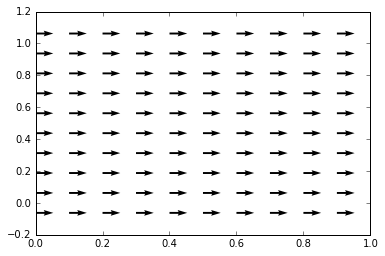

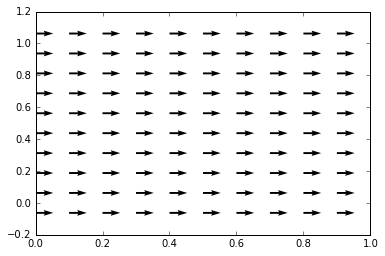

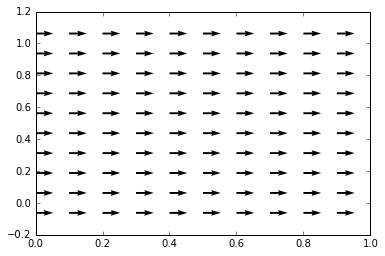

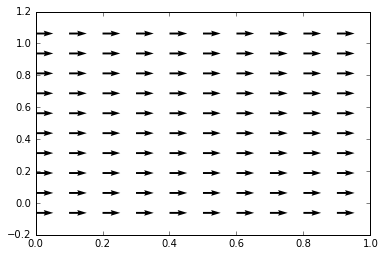

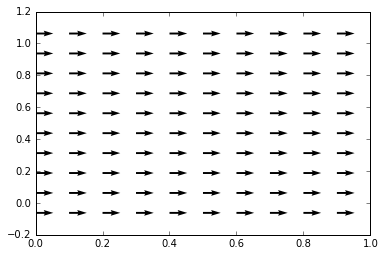

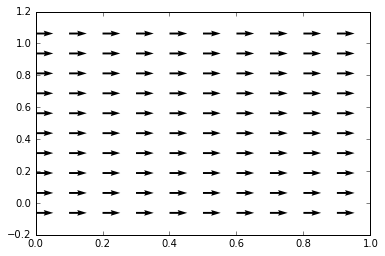

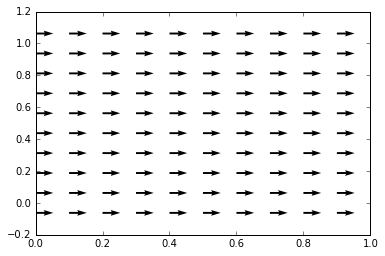

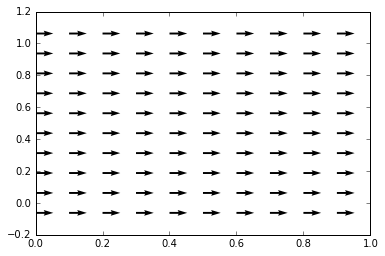

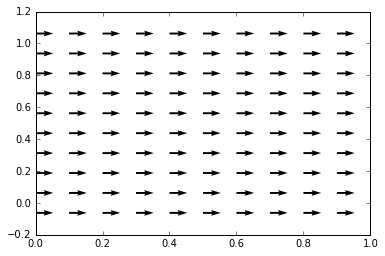

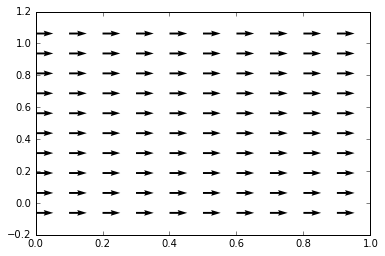

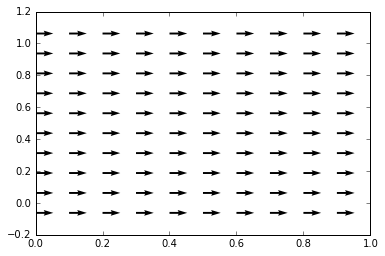

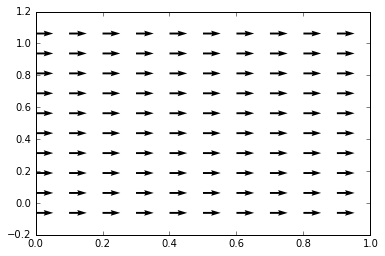

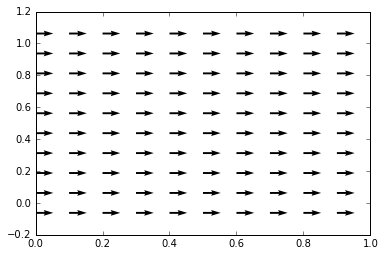

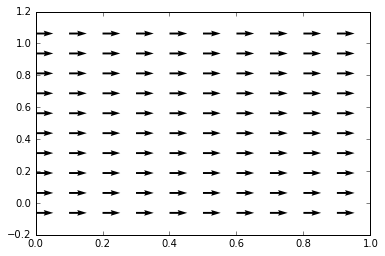

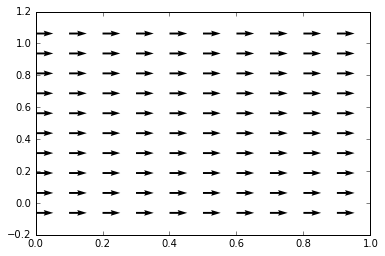

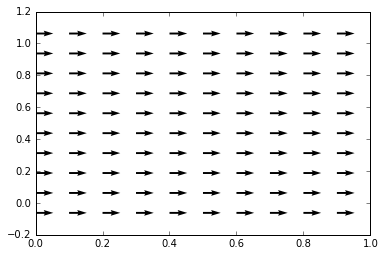

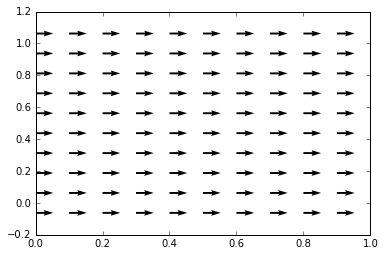

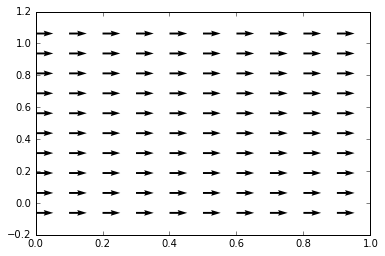

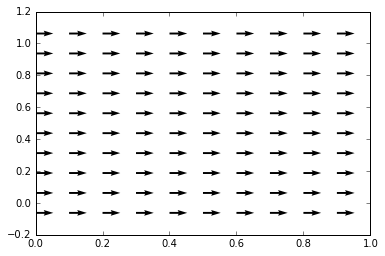

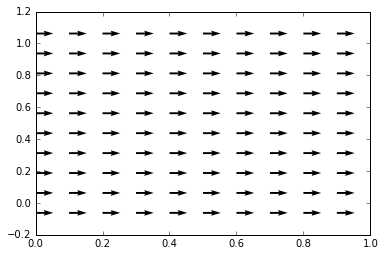

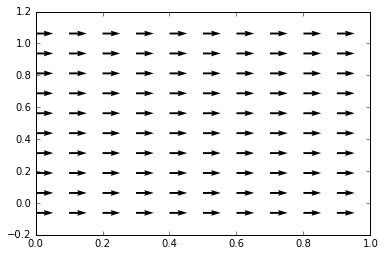

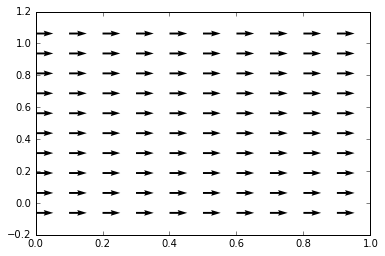

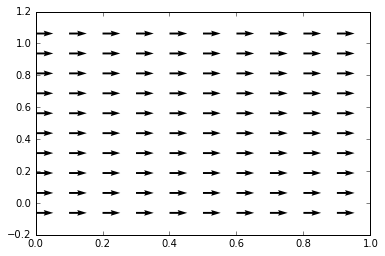

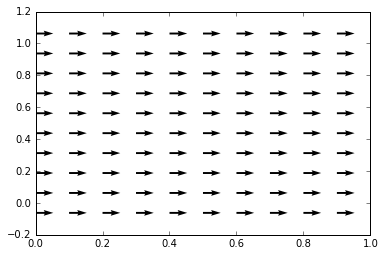

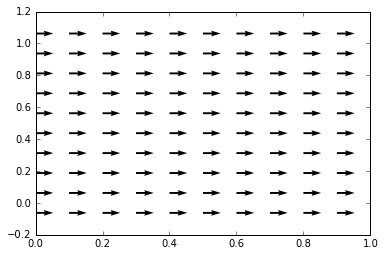

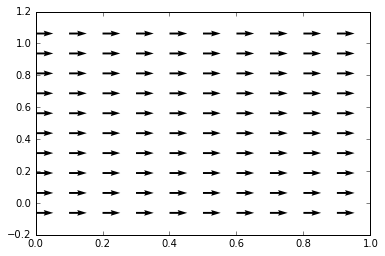

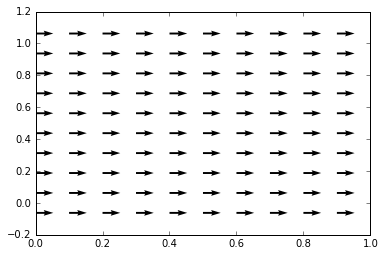

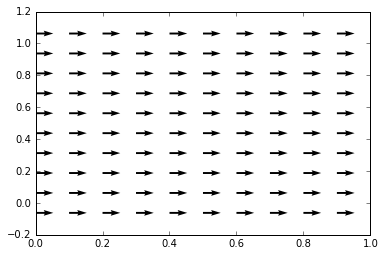

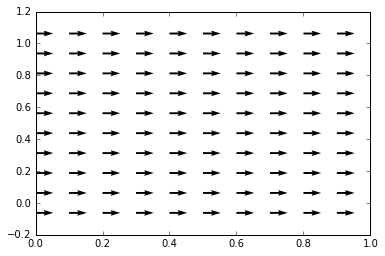

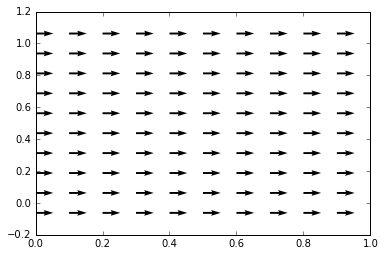

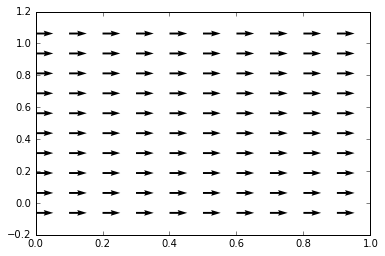

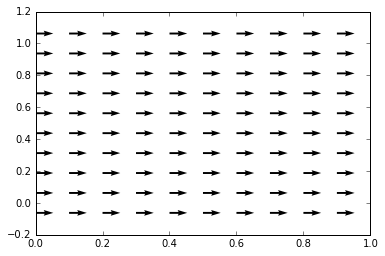

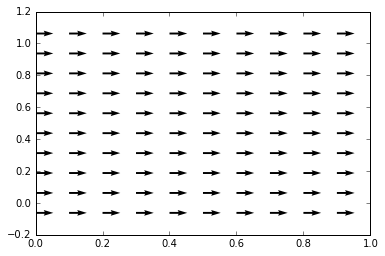

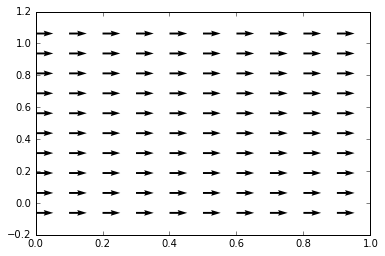

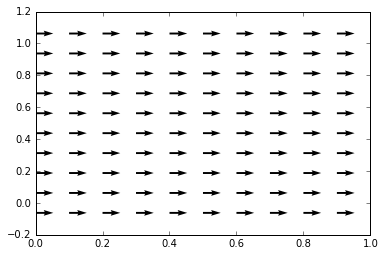

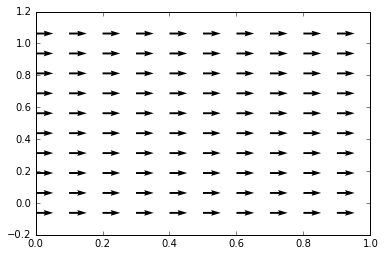

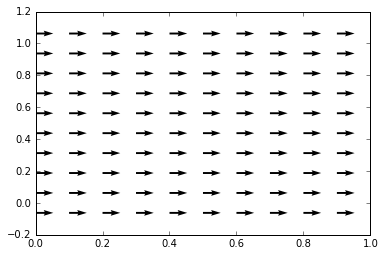

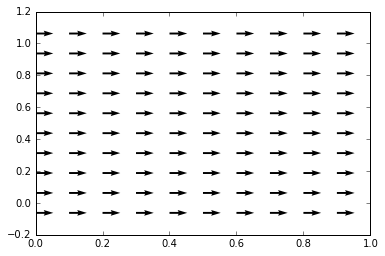

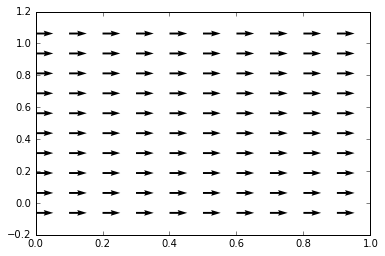

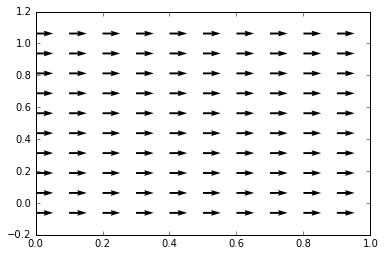

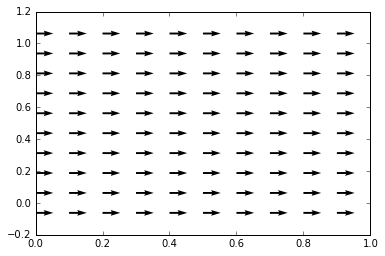

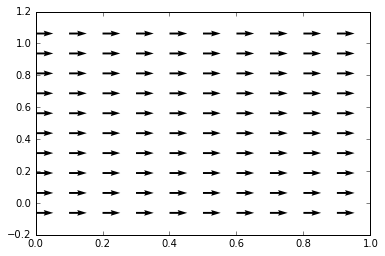

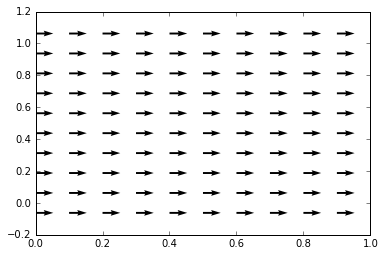

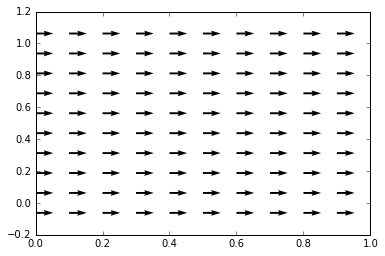

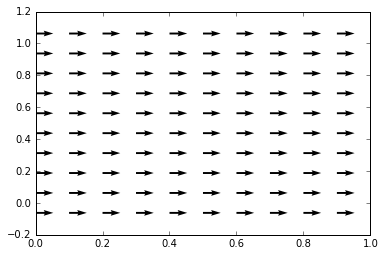

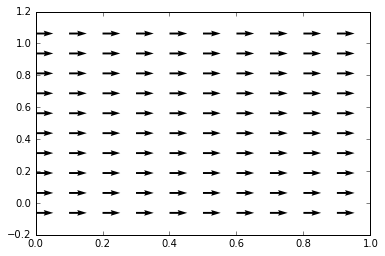

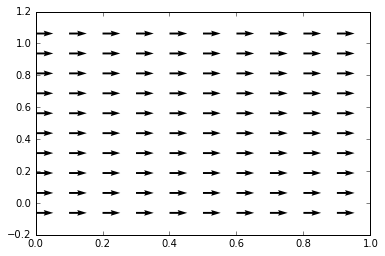

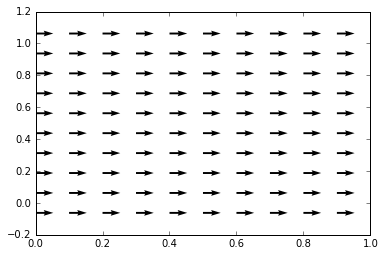

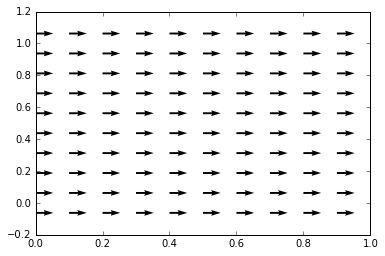

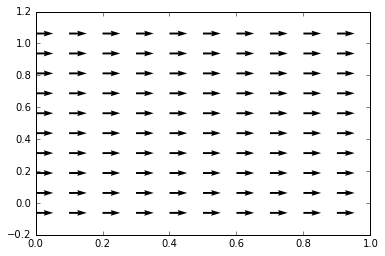

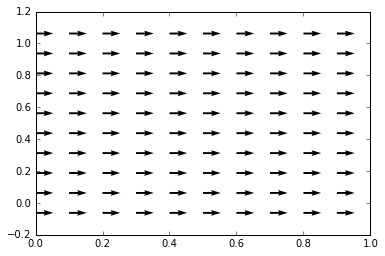

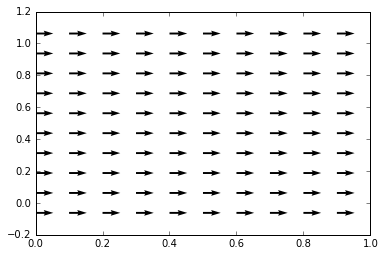

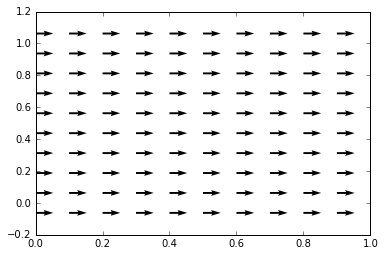

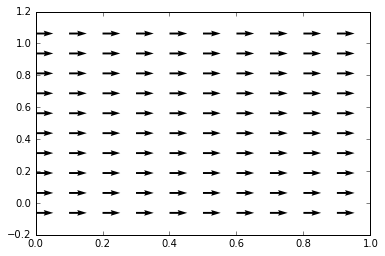

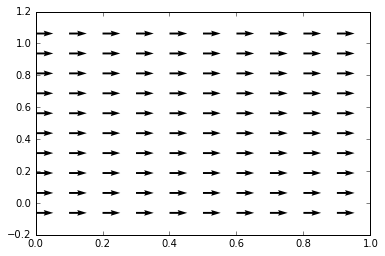

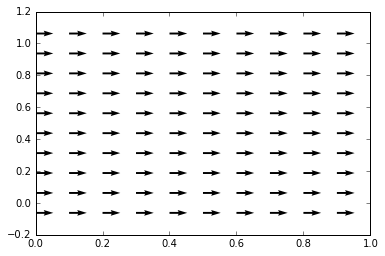

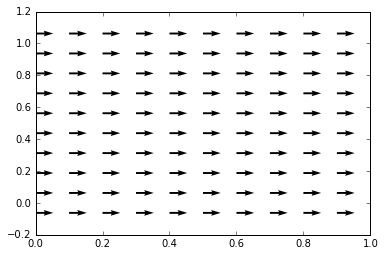

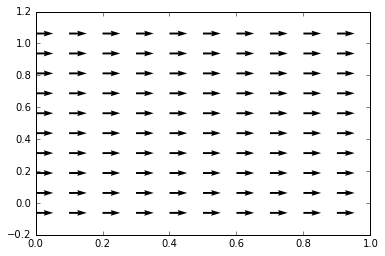

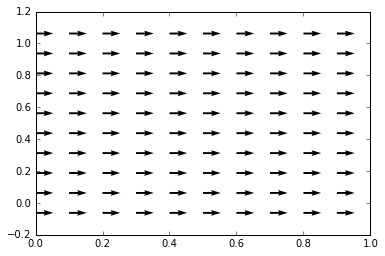

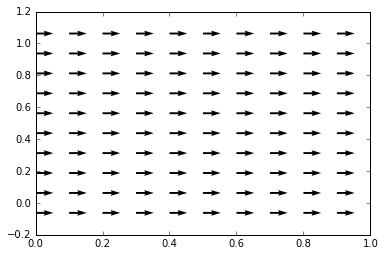

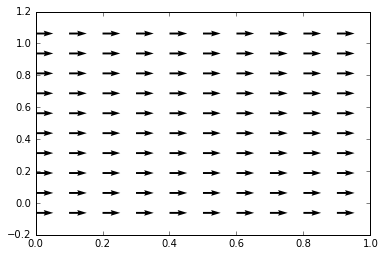

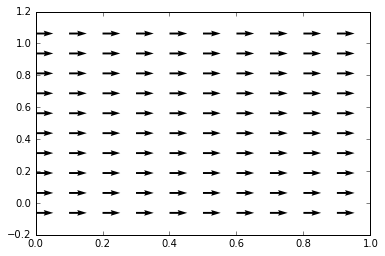

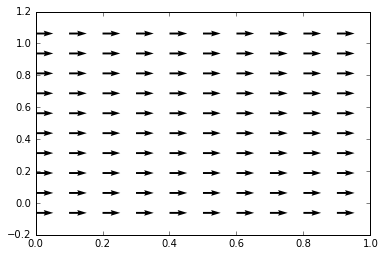

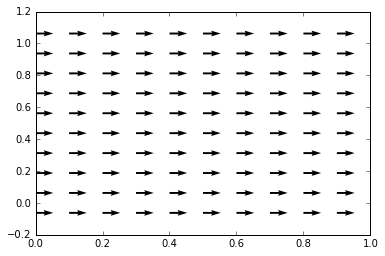

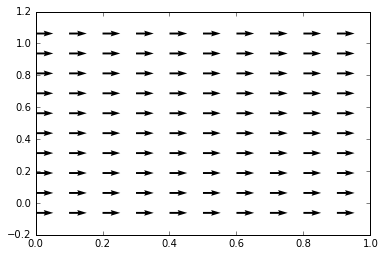

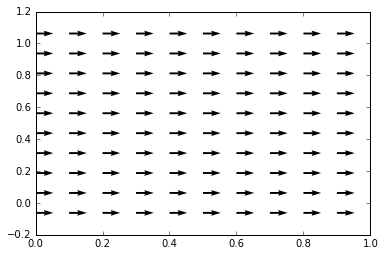

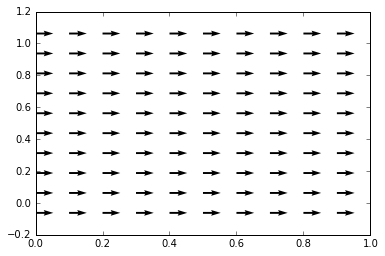

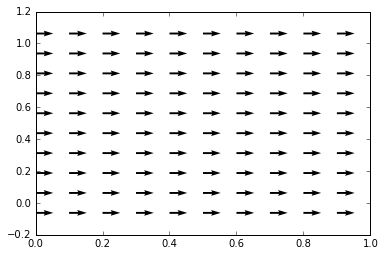

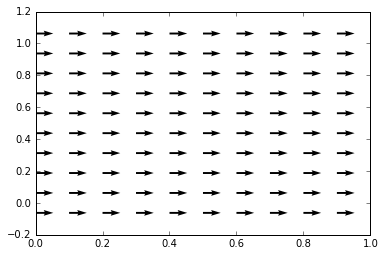

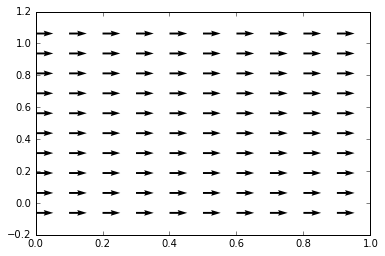

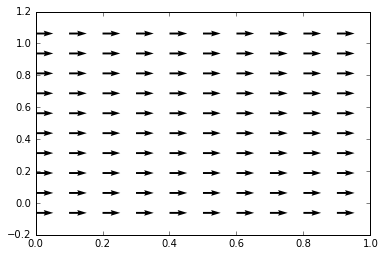

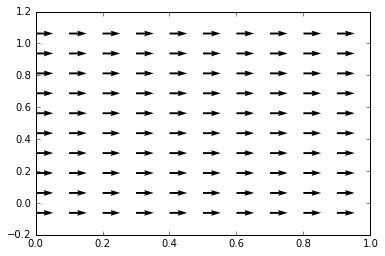

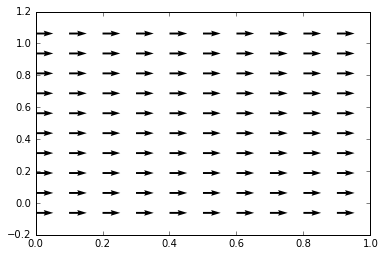

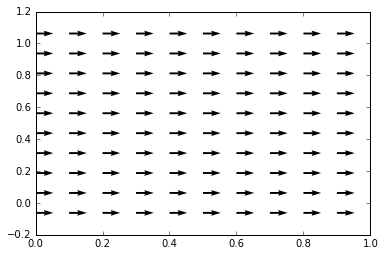

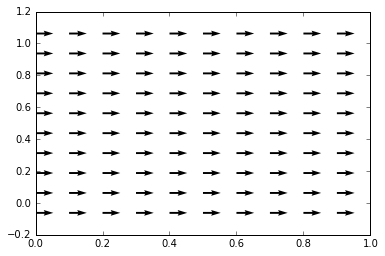

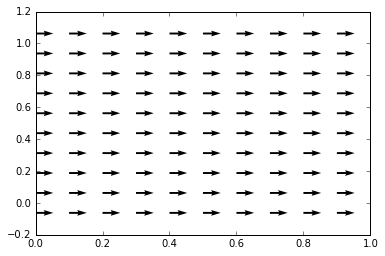

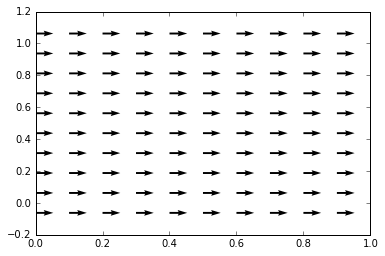

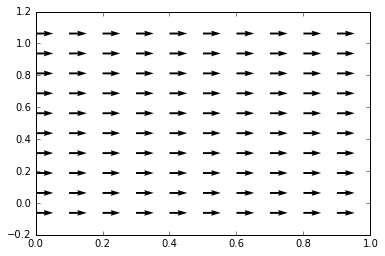

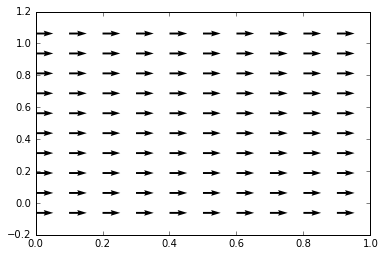

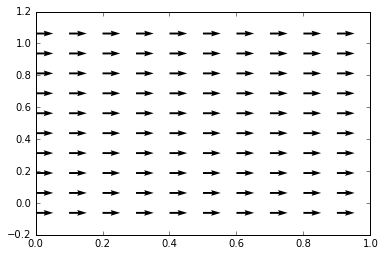

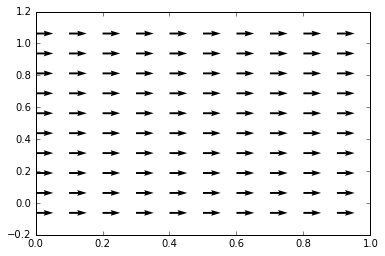

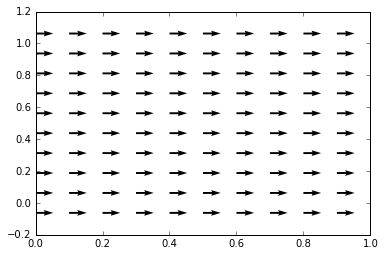

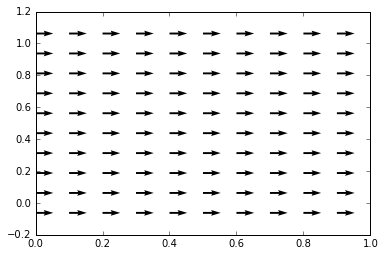

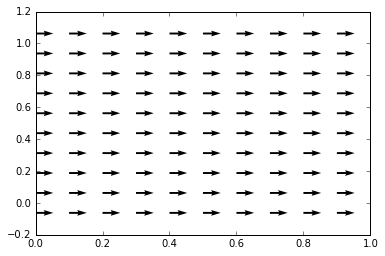

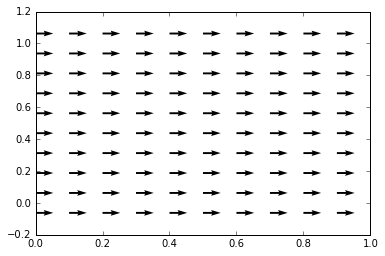

In [3]:
time_steps = 10000;

C = speed_of_sound;
tau = relaxation_constant;

rfiq = np.zeros(fi.shape[0:1]);
rfi = np.zeros(fi.shape);



for t in range(time_steps):
    U[:,:] = U[:,:] + 0.1;
    for i in range(0,9):
        rfiq = directional_weights[i] * (
            1 + 
            6 / 2 * (ei[0,i] * U + ei[1,i] * V) * C ** -2 + 
            9 / 2 * np.power(ei[0,i] * U + ei[1,i] * V,2) * C ** -4 -
            3 / 2 * (np.power(U,2) + np.power(V,2)) * C ** -2
        );
        rfi[:,:,i] = fi[:,:,i] + 1 / tau * rfiq;
    
    
    #c = -1; d = -2;
    #a = 0;  b = 1;
    
    #rfi[a,:,2] = np.roll(rfi[b,:,6],1);
    #rfi[a,:,3] = rfi[b,:,7];
    #rfi[a,:,4] = np.roll(rfi[b,:,8],-1);
    
    #rfi[c,:,8] = np.roll(rfi[d,:,4],-1);
    #rfi[c,:,7] = rfi[d,:,3];
    #rfi[c,:,6] = np.roll(rfi[d,:,2],1);
    
    for i in range(0,9):
        fi[:,:,i] = np.roll(np.roll(rfi[:,:,i], ei[0,i], axis=1), ei[1,i], axis=0);
        
    # Set boundary conditions
    #fi[-1,:,6:8]  = fi[-2,:,3:1:-1];
    #fi[0,:,1:3] = fi[1,:,8:6:-1];
    
    c = -1; d = -2;
    a = 0;  b = 1;
    
    fi[a,:,2] = np.roll(fi[b,:,6],1);
    fi[a,:,3] = fi[b,:,7];
    fi[a,:,4] = np.roll(fi[b,:,8],-1);
    
    fi[c,:,8] = np.roll(fi[d,:,4],-1);
    fi[c,:,7] = fi[d,:,3];
    fi[c,:,6] = np.roll(fi[d,:,2],1);
    
    #fi[c,:,[1,2,3,4]] = 0;
    #fi[a,:,[1,6,7,8]] = 0;
    
    rho = np.sum(fi, axis=2);
    temp1 = np.multiply(fi,ei[0,:]);
    temp1 = np.sum(temp1, axis=2);
    temp2 = np.multiply(fi,ei[1,:]);
    temp2 = np.sum(temp2, axis=2);
    U = np.divide(temp1, rho);
    V = np.divide(temp2, rho);

    
    if (t%10==0):
        a = 1;
        b = 100;
        fig = plt.figure();
        #Q = plt.pcolor(X,Y,U);
        #Q = plt.quiver(X,Y,U,V);
        Q = plt.quiver(X[::a, ::b],Y[::a, ::b],U[::a, ::b],V[::a, ::b]);
        #Q = plt.quiver(X[::1,::1],Y[::1,::10],U[::1,::10],V[::1,::10],units='width');
        
        display.clear_output(wait=True);
        display.display(fig);
        print(t);